## **Adult Income Prediction**

### Table of CONTENTS

- Understanding The Data
- Exploratory Data Analysis (EDA)
- Feature Engineering and Outliers
- Correlation
- Models
- Logistic Regression Model
- KNN Model
- SVM Model
- Compare Models Performance
- Final Model and Model Deployment
- Prediction
    - Conclusion

### Understanding The Data

#### Project Description:

- ***Adult Income Prediction*** This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.

#### Domain Knowledge:

***Economic Conditions***

- Technological Revolution:
At the beginning of the 1990s, the widespread adoption of the internet and the rapid development of computer technology led to significant changes in the labor market. Information technology and service sectors grew rapidly, creating many new job opportunities.

- Economic Growth:
The US economy entered a significant growth period from the mid-1990s. This growth was supported by low inflation and low unemployment rates. However, economic opportunities were not equally distributed across all regions and groups. 

***Social and Political Situation***

- Diversity and Immigration:
In the 1990s, the number of people immigrating to the US increased. Immigrants played a crucial role in the labor market and met labor demands in many sectors. This situation also led to some social tensions and debates.

- Education and Workforce:
The increasing importance of education levels in the labor market directly affected individuals' income levels. Higher-educated individuals generally worked in higher-paying jobs, while lower-educated individuals had to work in low-wage jobs.

***Demographic Changes***

- Aging Population:
The aging of the baby boomer generation began to put pressure on social security systems and healthcare services. The increasing number of individuals reaching retirement age also led to changes in the labor market.

- Women's Participation in the Workforce:
Women's participation in the workforce increased significantly in the 1990s. This led to an increase in household incomes and changes in gender roles in society.

***Sectoral Changes***

- Transformation of the Manufacturing Industry:
In the 1990s, while the manufacturing industry declined in some regions, the service and technology-based sectors grew. This transformation led to increased unemployment rates in some areas and economic imbalances.

- Globalization:
Globalization led to increased trade and investments. Many US companies moved their production facilities abroad while gaining access to global markets. This caused some uncertainties and changes in the labor market.

In this context, the data obtained from the 1994 Census reflects the aforementioned economic, social, and demographic changes. By examining the impact of education levels, gender, race, and occupations on income in the labor market, we can better understand the social dynamics of that period. These analyses can also contribute to understanding the changes and continuities in comparison with today's conditions.

#### About the Dataset

***Dataset Descriptions:***

***Rows:*** 32561

***Columns:*** 15

| STT | Attribute | Name Unique Values |
| --- | --- | --- |
| 1 | Age | Describes the age of individuals. Continuous. |
| 2 | Workclass | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. |
| 3 | fnlwgt | Continuous. This is a weighting factor created by the US Census Bureau and indicates the number of people represented by each data entry. |
| 4 | education | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. |
| 5 | education-num | Number of years spent in education. Continuous. |
| 6 | marital-status | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. |
| 7 | occupation | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. |
| 8 | relationship | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. |
| 9 | race | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. |
| 10 | sex | Female, Male. |
| 11 | capital-gain | Represents the profit an individual makes from the sale of assets (e.g., stocks or real estate). Continuous. |
| 12 | capital-loss | Represents the loss an individual incurs from the sale of assets (e.g., stocks or real estate). Continuous. |
| 13 | hours-per-week | Continuous. |
| 14 | native-country | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad & Tobago, Peru, Hong, Netherlands. |
| 15 | salary | >50K, <=50K. |

#### Import Libraries and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, average_precision_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from yellowbrick.regressor import ResidualsPlot, PredictionError
import warnings
warnings.filterwarnings("ignore")

In [2]:
df0 = pd.read_csv('adult.csv')
df = df0.copy()

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [5]:
df.tail()

age workclass  fnlwgt     education  education.num      marital.status  \
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K

### Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education.num   32561.0      10.080679       2.572720      1.0       9.0   
capital.gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital.loss    32561.0      87.303830     402.960219      0.0       0.0   
hours.per.week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

In [9]:
df.describe(include="object").T

count unique                 top   freq
workclass       30725      8             Private  22696
education       32561     16             HS-grad  10501
marital.status  32561      7  Married-civ-spouse  14976
occupation      30718     14      Prof-specialty   4140
relationship    32561      6             Husband  13193
race            32561      5               White  27816
sex             32561      2                Male  21790
native.country  31978     41       United-States  29170
income          32561      2               <=50K  24720

In [10]:
df.duplicated().sum()

np.int64(24)

In [11]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped..!")
        print("No more duplicate rows..!")
    else:
        print("There are no duplicated observation in the dataset...")

In [12]:
duplicate_values(df)

Duplicate check...
There are 24 duplicated observations in the dataset
24 duplicates were dropped..!
No more duplicate rows..!


In [13]:
df.isnull().sum().sum()

np.int64(4261)

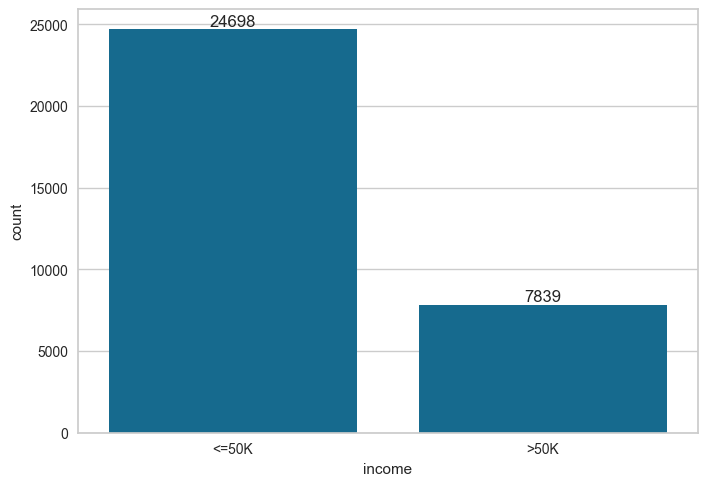

In [14]:
ax = sns.countplot(x="income", data=df)
ax.bar_label(ax.containers[0]);

Our data is unbalance data.

#### Feature Summary

In [15]:
# !pip install ipywidgets ydata-profiling
#from ydata_profiling import ProfileReport
#profile = ProfileReport(df, title="Profiling Report")
#profile.to_file("profiling_report.html")

In [16]:
from summarytools import dfSummary
dfSummary(df)

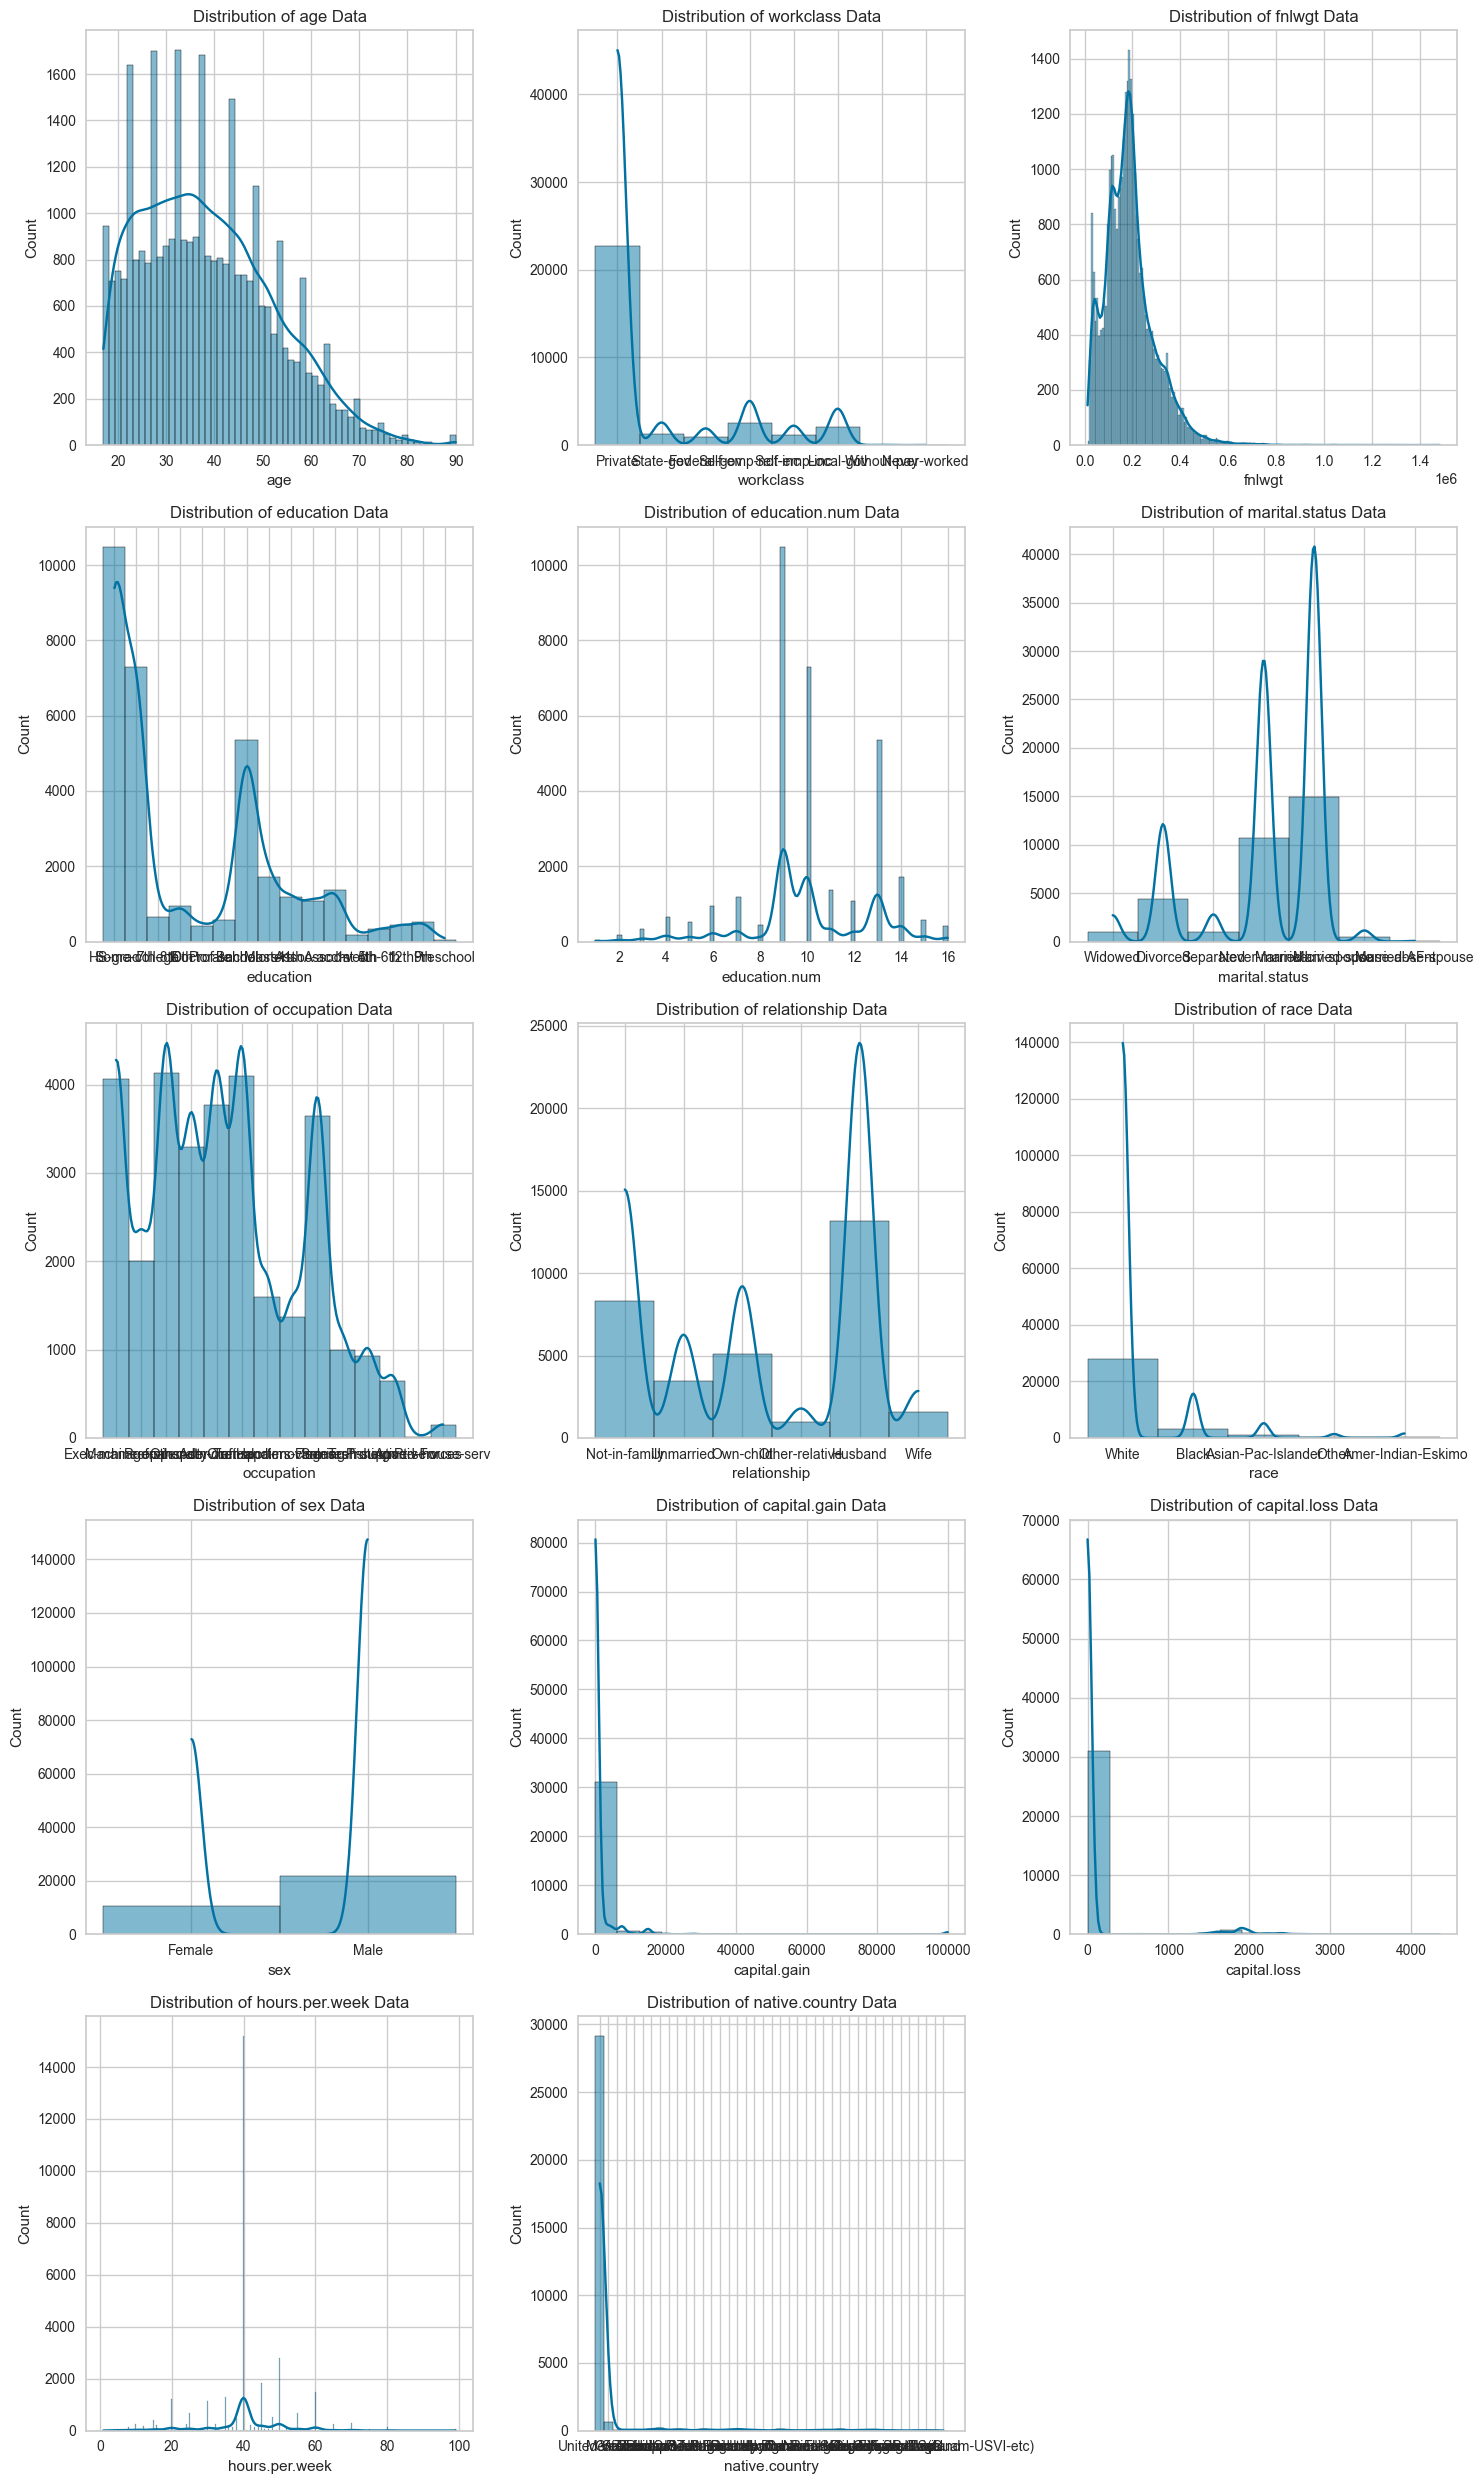

In [17]:
import math

num_cols = df.iloc[:, :-1].shape[1] 
num_rows = math.ceil(num_cols / 3) 

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(df.iloc[:, :-1].columns, 1):
    plt.subplot(num_rows, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
plt.show()

In [18]:
num_cols= df.select_dtypes('number').columns

skew_limit = 0.75               # define a limit above which we will log transform
skew_vals = df[num_cols].skew()


# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

Skew
capital.gain  11.949403
capital.loss   4.592702
fnlwgt         1.447703

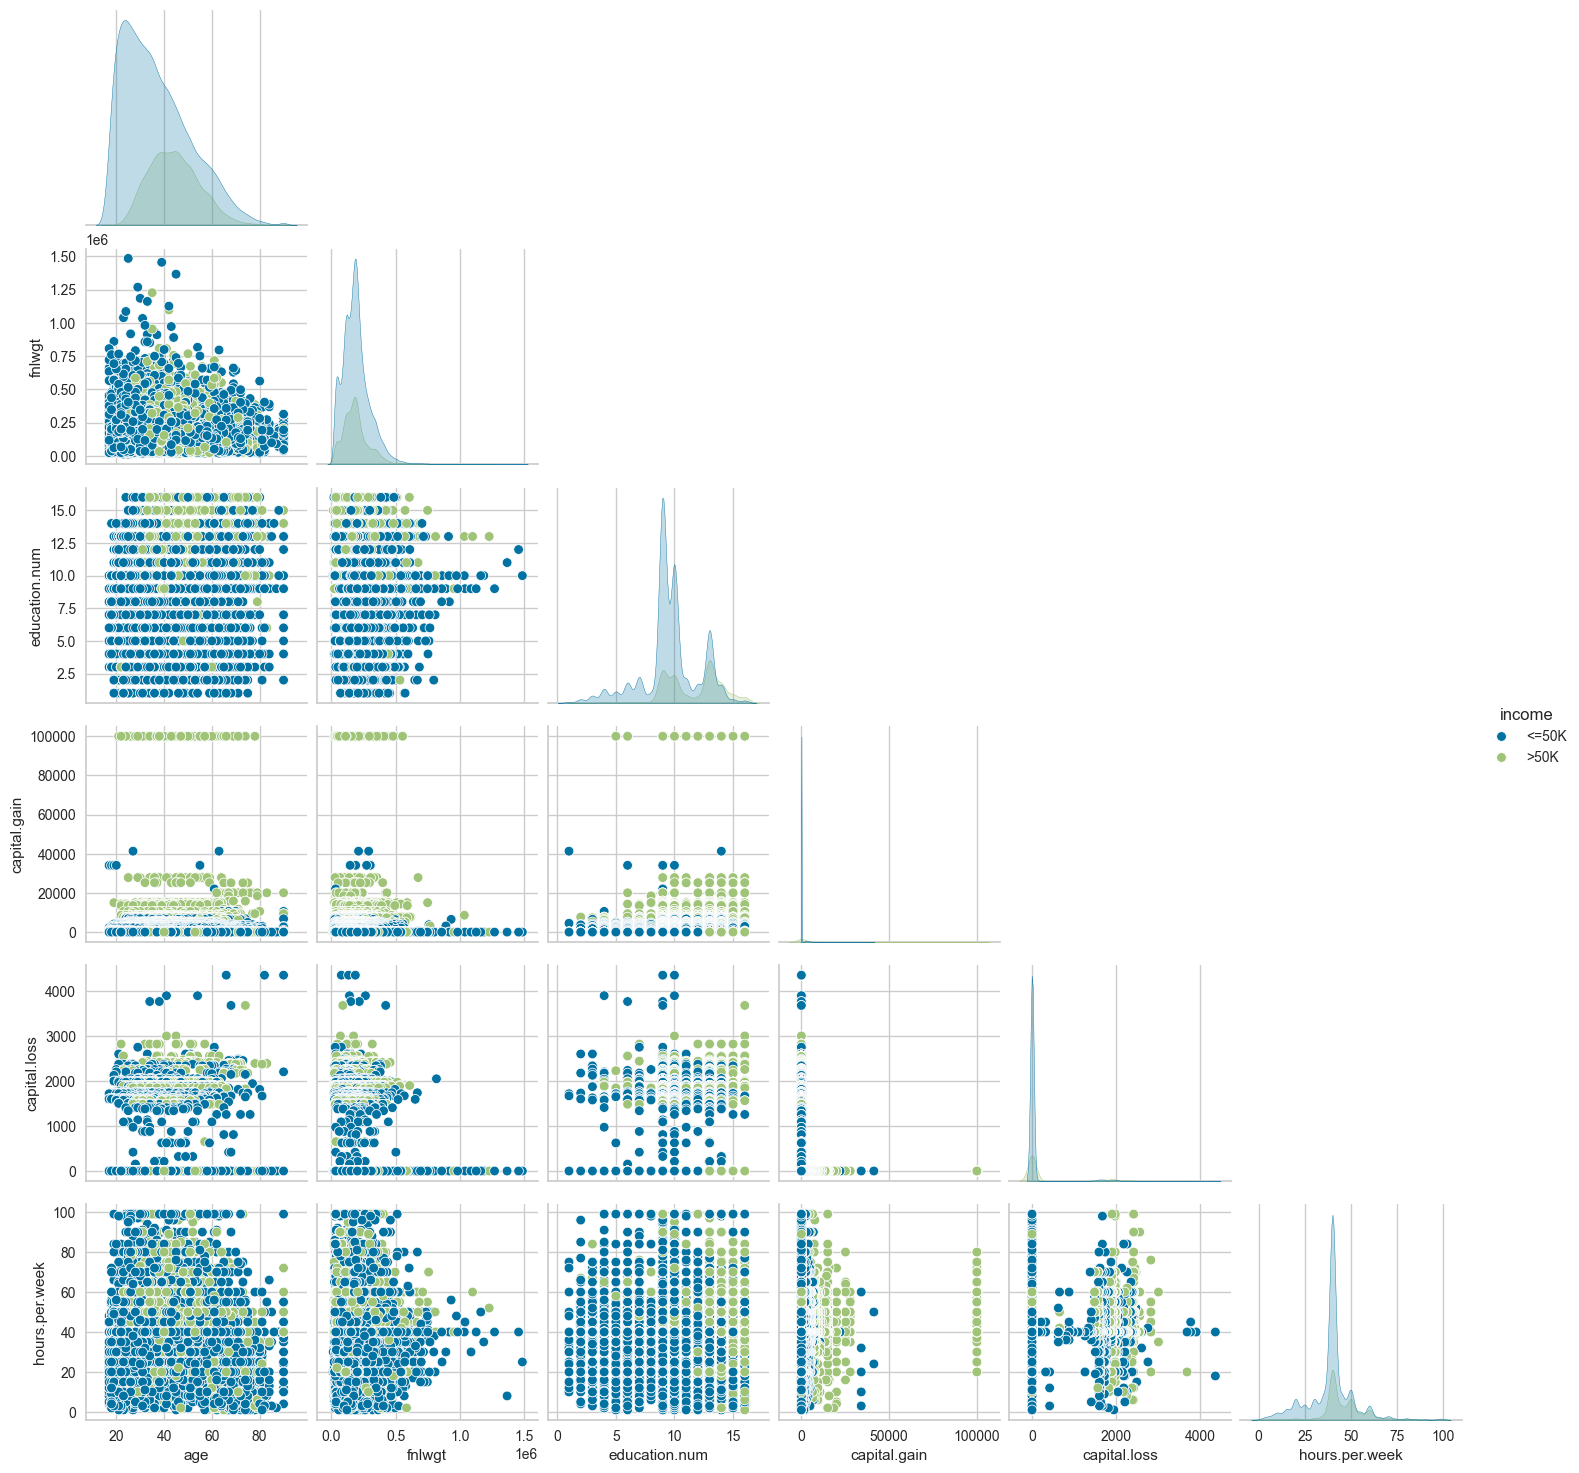

In [19]:
sns.pairplot(df, hue="income", corner=True);

In [20]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
cat_features = [col for col in cat_features if col != 'income']
cat_features

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [21]:
num_features = df.select_dtypes(include=['number']).columns.tolist()

In [22]:
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

#### Handling Missing Values

In [23]:
df.isnull().sum().sum()

np.int64(4261)

In [24]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

count  percentage
age                 0        0.00
workclass        1836        5.64
fnlwgt              0        0.00
education           0        0.00
education.num       0        0.00
marital.status      0        0.00
occupation       1843        5.66
relationship        0        0.00
race                0        0.00
sex                 0        0.00
capital.gain        0        0.00
capital.loss        0        0.00
hours.per.week      0        0.00
native.country    582        1.79
income              0        0.00

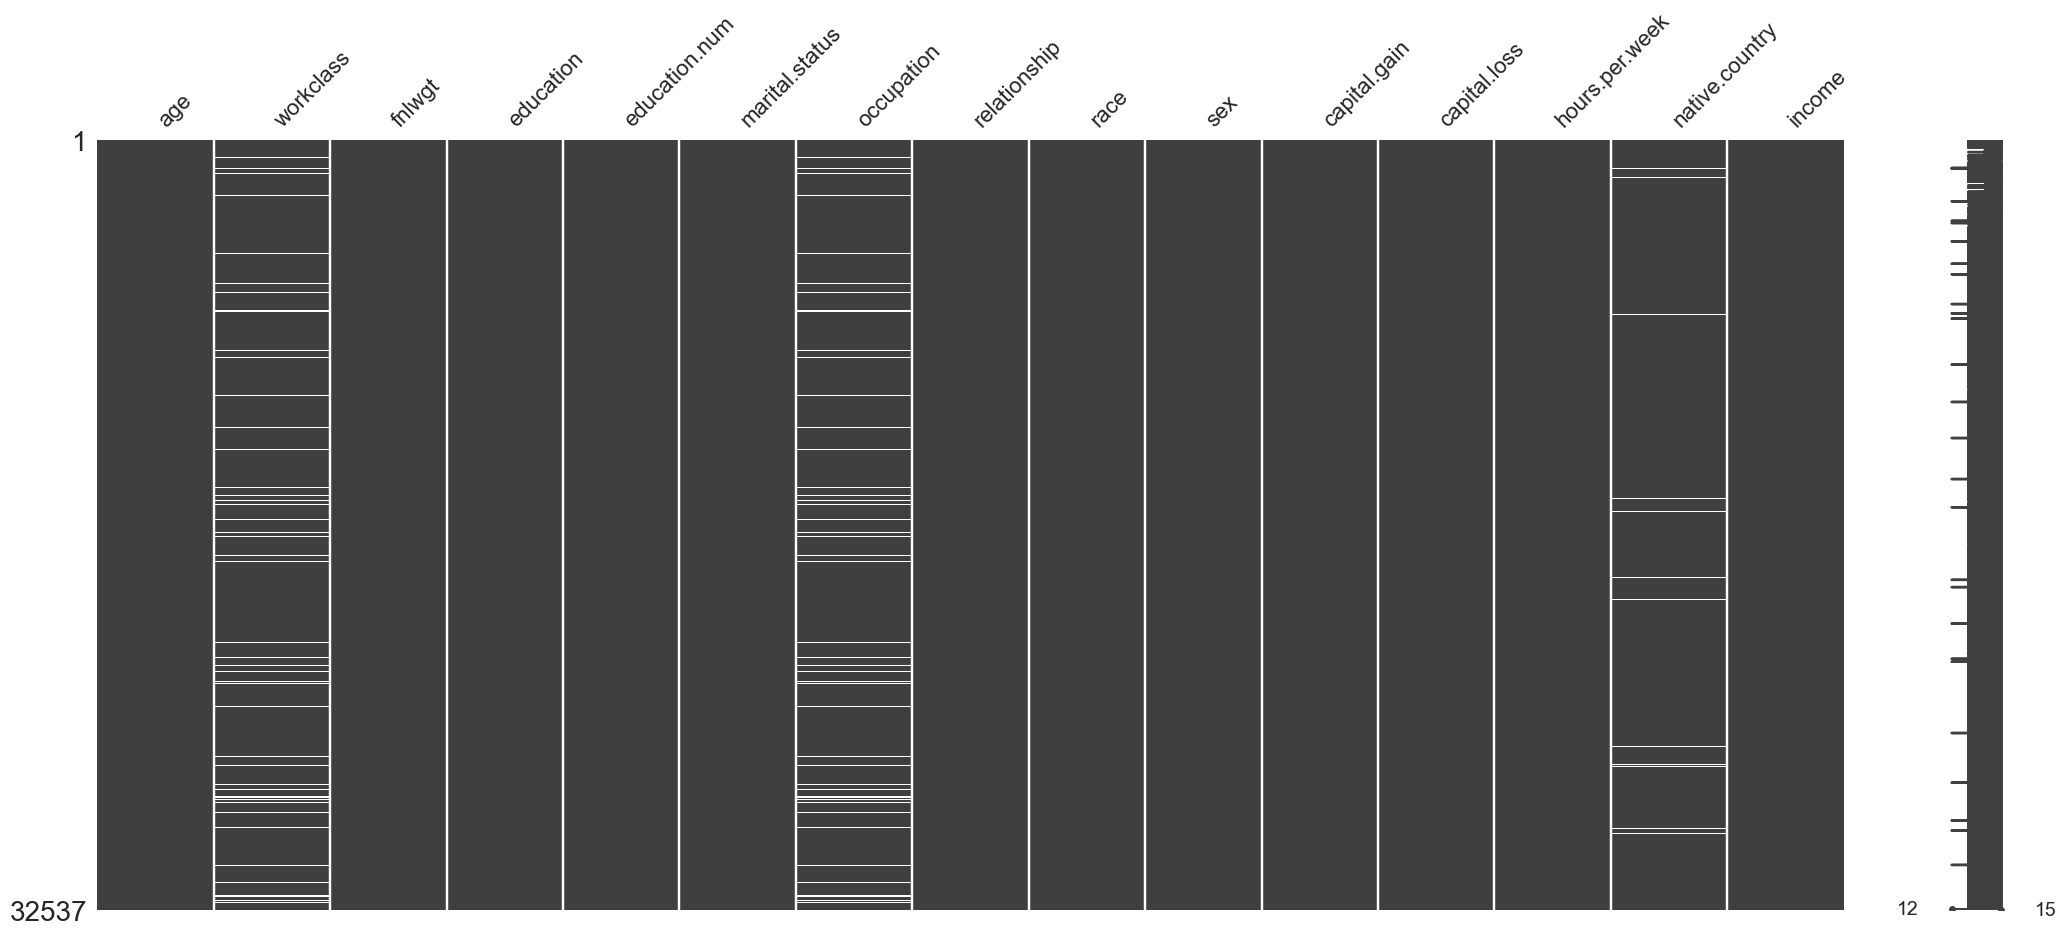

In [25]:
import missingno as msno
msno.matrix(df);

In [26]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
df[num_features] = num_imputer.fit_transform(df[num_features])

# Impute categorical columns
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

In [27]:
# Let's observe our data in a table 

def get_unique_values(df):
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [28]:
get_unique_values(df)

Column Name  Number of Unique Values  \
0              age                       73   
1        workclass                        8   
2           fnlwgt                    21648   
3        education                       16   
4    education.num                       16   
5   marital.status                        7   
6       occupation                       14   
7     relationship                        6   
8             race                        5   
9              sex                        2   
10    capital.gain                      119   
11    capital.loss                       92   
12  hours.per.week                       94   
13  native.country                       41   
14          income                        2   

                                       Unique Values  Data Type  
0                                                   -   float64  
1   [Private, State-gov, Federal-gov, Self-emp-not...    object  
2                                                   -   float64  
3                                                   -    object  
4                                                   -   float64  
5   [Widowed, Divorced, Separated, Never-married, ...    object  
6                                                   -    object  
7   [Not-in-family, Unmarried, Own-child, Other-re...    object  
8   [White, Black, Asian-Pac-Islander, Other, Amer...    object  
9                                      [Female, Male]    object  
10                                                  -   float64  
11                                                  -   float64  
12                                                  -   float64  
13                                                  -    object  
14                                             [0, 1]     int64

In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature", "Unique values per Numerical feature"))

for col_type, col, color in [("exclude", 1, '#016CC9'), ("include", 2, '#DEB078')]:
    temp_data = df.select_dtypes(**{col_type: "number"}).nunique().sort_values()
    fig.add_trace(go.Bar(x=temp_data.index, y=temp_data.values, marker=dict(color=color)), row=1, col=col)

fig.show()

### Feature Engineering and Outliers

#### Categorical Features

In [30]:
df[cat_features].columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

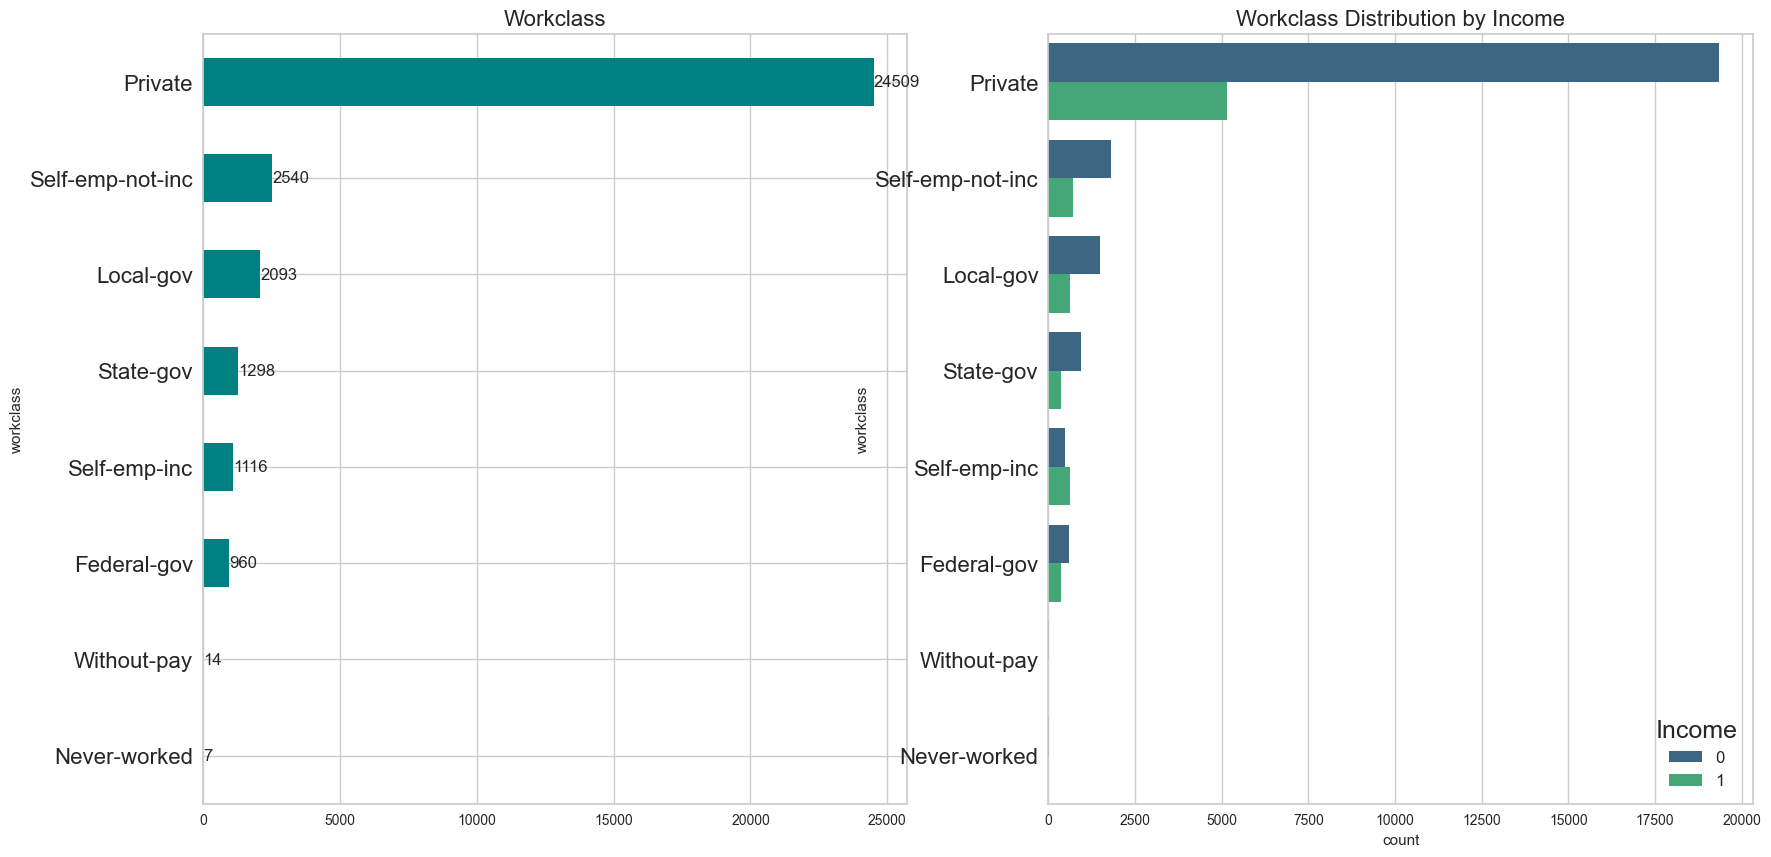

In [31]:
sorted_workclass = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

counts = df['workclass'].value_counts().reindex(sorted_workclass[::-1])
counts.plot(kind="barh", ax=ax1, color="teal")
ax1.set_title('Workclass', fontsize=16)
ax1.bar_label(ax1.containers[0], labels=counts.values, fontsize=12)
ax1.tick_params(axis='y', labelsize=16) 

# 2.grafig: Workclass Distribution by Income
sns.countplot(y=df["workclass"], hue=df['income'].astype(str), ax=ax2, palette='viridis', order=sorted_workclass)
ax2.set_title('Workclass Distribution by Income', fontsize=16)
ax2.legend(title='Income', loc='lower right', fontsize=12, title_fontsize='18')
ax2.tick_params(axis='y', labelsize=16);



***General Insights***

- The private sector is the most dominant category among the work classes and creates a significant disparity in income distribution.

- Among self-employed individuals, those who are incorporated earn higher incomes compared to those who are not incorporated.

- For local, state, and federal government jobs, the low-income category is dominant; however, a significant portion also falls into the high-income category.

- Individuals who work without pay and those who have never worked are generally found in the low-income category.



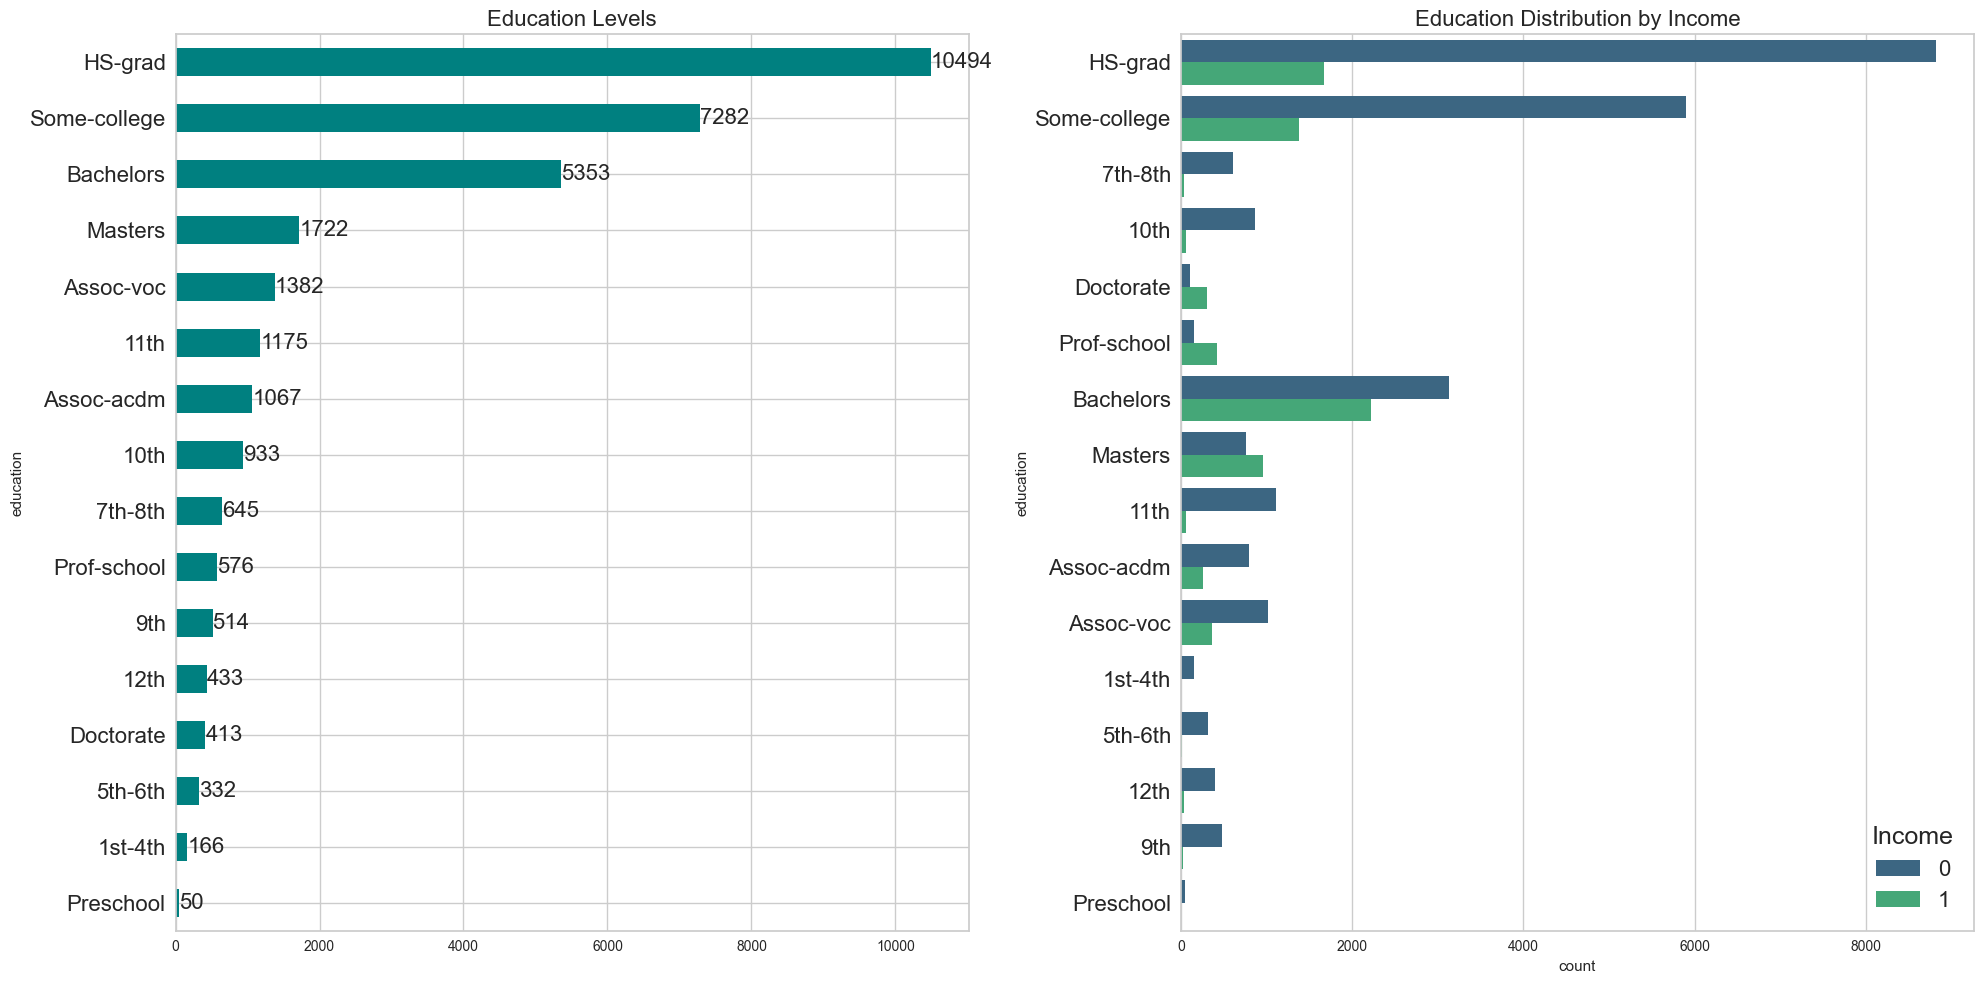

In [32]:
sorted_education = df['education'].value_counts().index[::-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Birinci grafik: Top Education Levels
counts = df['education'].value_counts().reindex(sorted_education)
counts.plot(kind="barh", ax=ax1, color="teal")
ax1.set_title('Education Levels', fontsize=16)
ax1.bar_label(ax1.containers[0], labels=counts.values, fontsize=16)
ax1.tick_params(axis='y', labelsize=16) 

# İkinci grafik: Education Distribution by Income
sns.countplot(y=df["education"], hue=df['income'].astype(str), ax=ax2, palette='viridis')
ax2.set_title('Education Distribution by Income', fontsize=16)
ax2.legend(title='Income', loc='lower right', fontsize=16, title_fontsize='18')
ax2.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()

In [33]:
df['education'].replace(['1st-4th', '5th-6th'], 'elementary_school', inplace=True)
df['education'].replace(['7th-8th', '9th', '10th', '11th', '12th'], 'secondary_school', inplace=True)
df['education'].replace(['Assoc-acdm', 'Assoc-voc'], 'Assoc', inplace=True)

***Category Merging:*** Dividing education levels into too many categories can complicate data analysis and modeling processes. Therefore, similar levels have been combined to form larger and more meaningful categories.

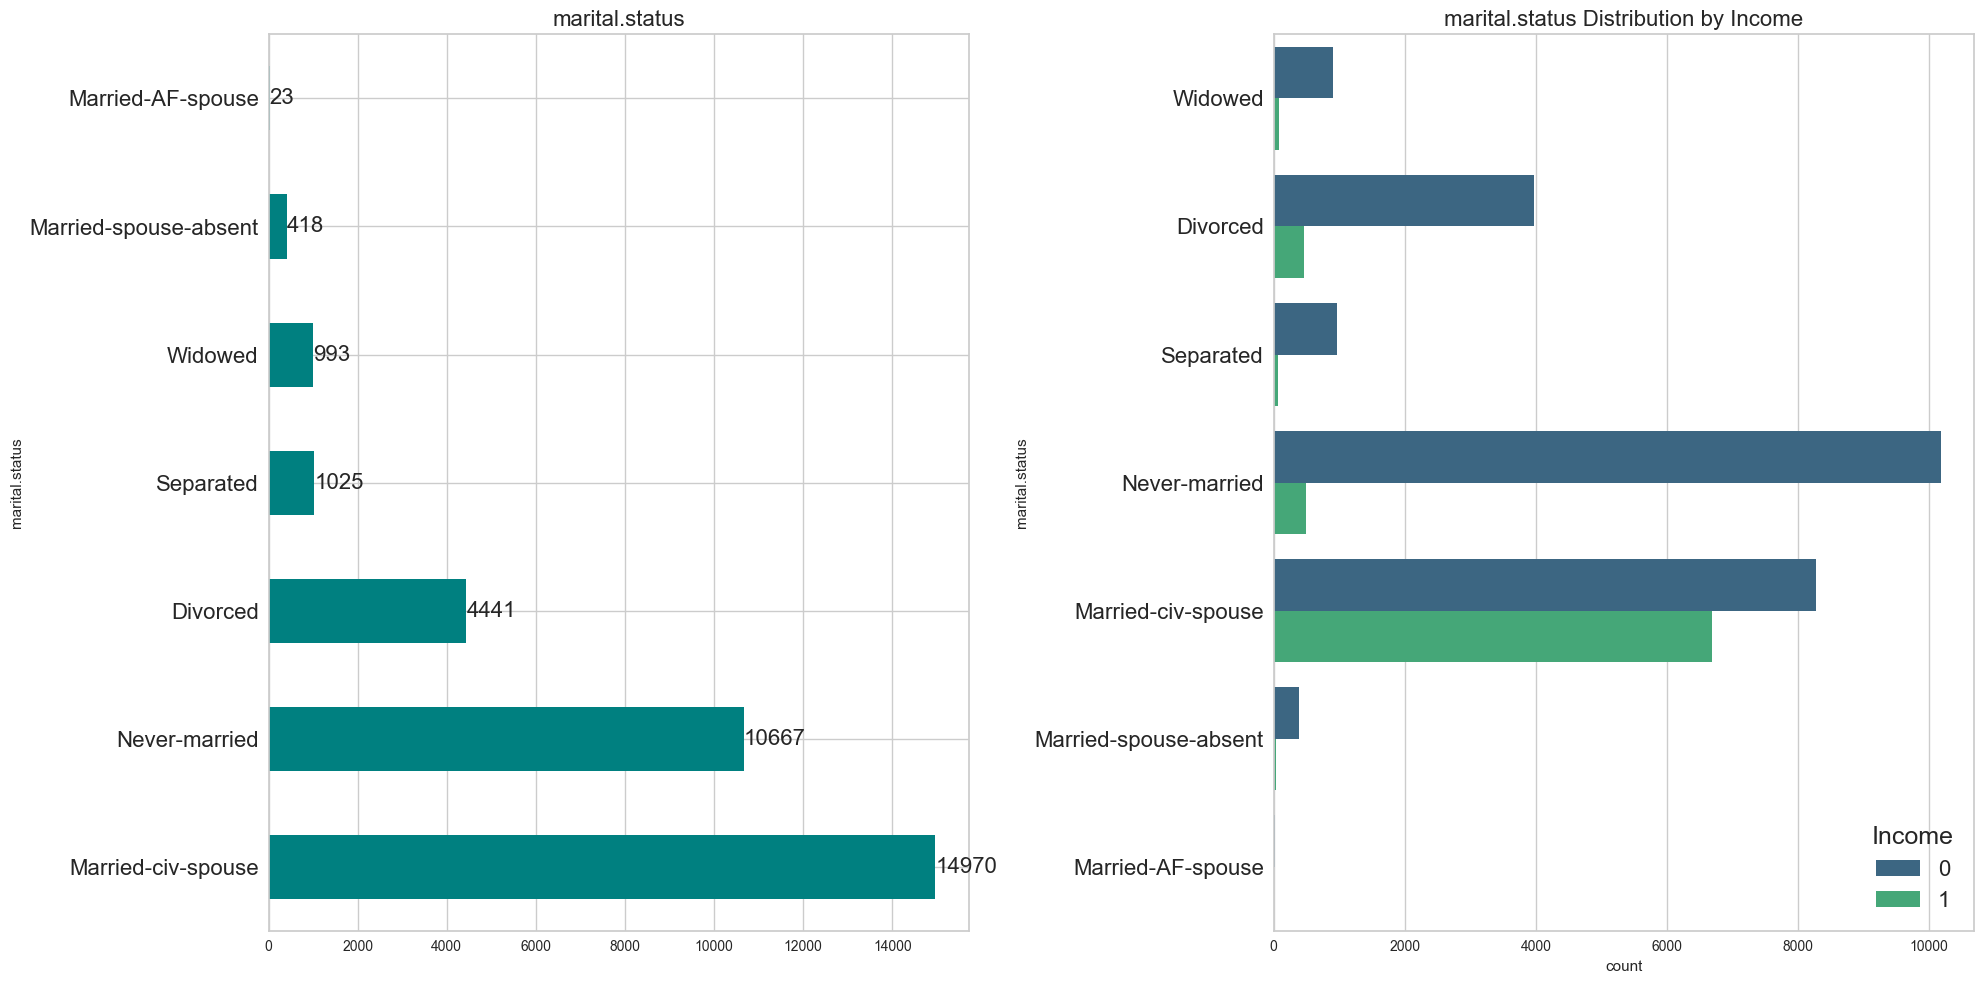

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Birinci grafik: Top Education Levels
counts = df['marital.status'].value_counts()
counts.plot(kind="barh", ax=ax1, color="teal")
ax1.set_title('marital.status', fontsize=16)
ax1.bar_label(ax1.containers[0], labels=counts.values, fontsize=16)
ax1.tick_params(axis='y', labelsize=16) 

# İkinci grafik: Education Distribution by Income
sns.countplot(y=df["marital.status"], hue=df['income'].astype(str), ax=ax2, palette='viridis')
ax2.set_title('marital.status Distribution by Income', fontsize=16)
ax2.legend(title='Income', loc='lower right', fontsize=16, title_fontsize='18')
ax2.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()

In [35]:
df['marital.status'].replace(
    ['Never-married'], 'NotMarried', inplace=True
)
df['marital.status'].replace(
    ['Married-AF-spouse', 'Married-civ-spouse'], 'Married', inplace=True
)
df['marital.status'].replace(
    ['Married-spouse-absent', 'Separated'], 'Separated', inplace=True
)
df['marital.status'].replace(
    ['Divorced', 'Widowed'], 'Widowed', inplace=True
)

***Marital Status Categories Merging*** In order to simplify the analysis and improve model performance, we combined similar marital status categories. This helps in reducing the number of distinct categories, making the data more manageable and the results more interpretable.

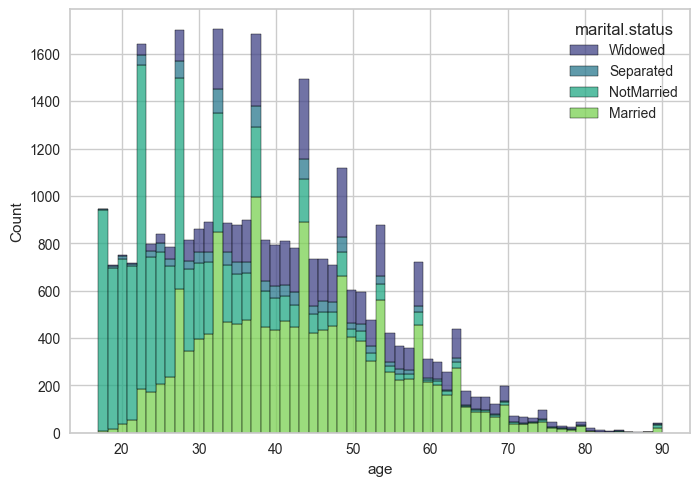

In [36]:
sns.histplot(data=df, x='age', hue='marital.status', multiple='stack', palette='viridis');



***General Insights***

***Marriage and Age:*** Marriage rates are low among young adults, peak in middle age, and decline again in older age. This indicates that focusing on education and career is common in early life, marriage and family building are more prevalent in middle age, and loss of a spouse increases in older age.

- ***Tendency Not to Marry:*** The non-marriage rates are higher among younger age groups, suggesting that education and career-oriented lifestyles are more common in modern societies.

- ***Loss of Spouse and Separations:*** Widowhood is more common in older age, while separations are more concentrated in middle age. This suggests that both increased rates of spouse loss due to health reasons and midlife crises or marital problems are more frequent in these age groups.



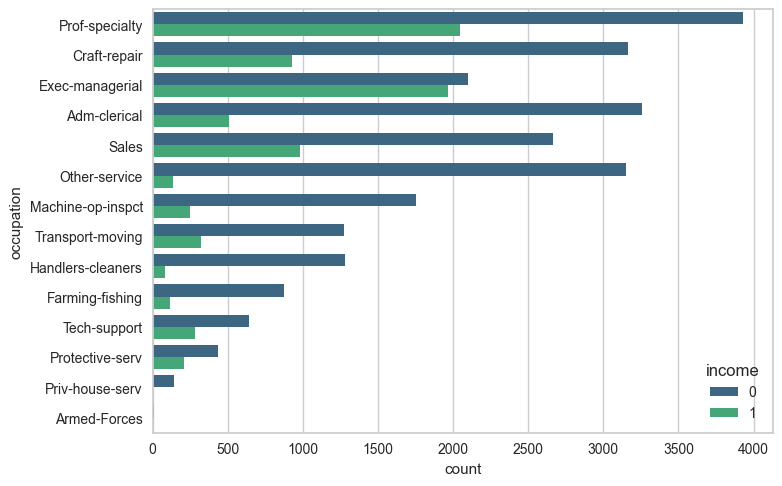

In [37]:
sns.countplot(y='occupation', hue='income', data=df, order=df['occupation'].value_counts().index, palette='viridis');

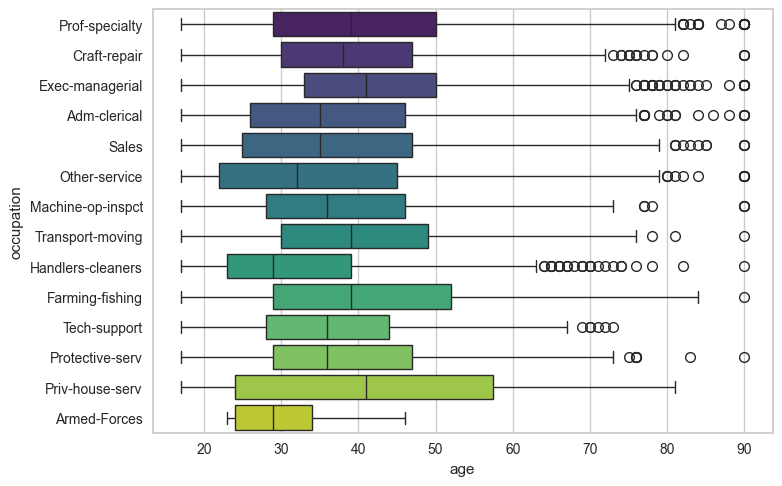

In [38]:
sns.boxplot(y='occupation', x='age', data=df, order=df['occupation'].value_counts().index, palette='viridis');

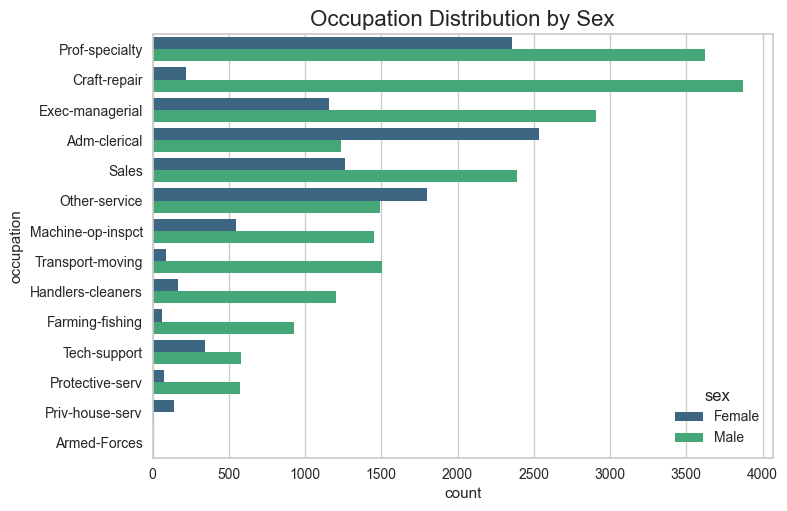

In [39]:
sns.countplot(y='occupation', hue='sex', data=df, order=df['occupation'].value_counts().index, palette='viridis')
plt.title('Occupation Distribution by Sex', fontsize=16);

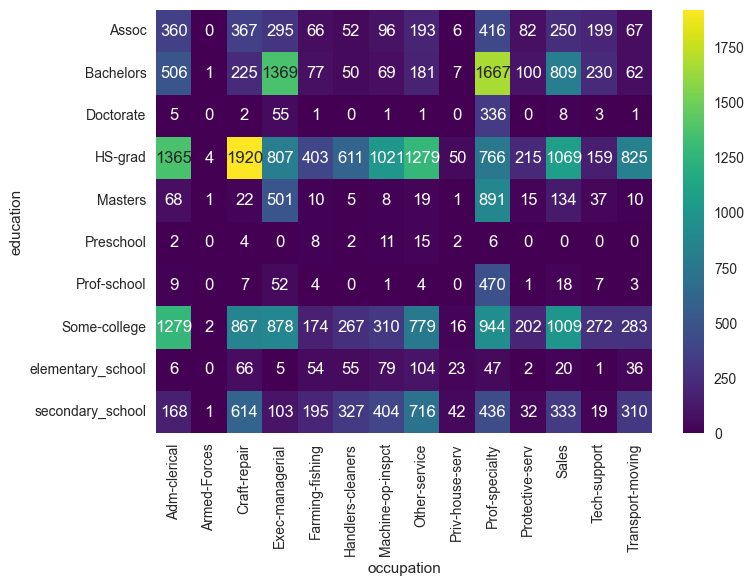

In [40]:
pivot_table = df.pivot_table(index='education', columns='occupation', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis');



***General Insights***

- ***General InsightsIncome and Occupation:*** Professional and managerial roles yield higher incomes, while service and manual labor roles are lower-income.
- ***Age and Occupation:*** Older individuals are more prevalent in high-responsibility roles, whereas younger individuals occupy more entry-level or physically demanding jobs.
- ***Gender and Occupation:*** There are significant gender disparities, with males dominating technical and managerial fields and females more present in clerical and service roles.
- ***Education and Occupation:*** Higher education levels correlate with higher-level occupations, whereas lower education levels are sufficient for service and manual jobs.



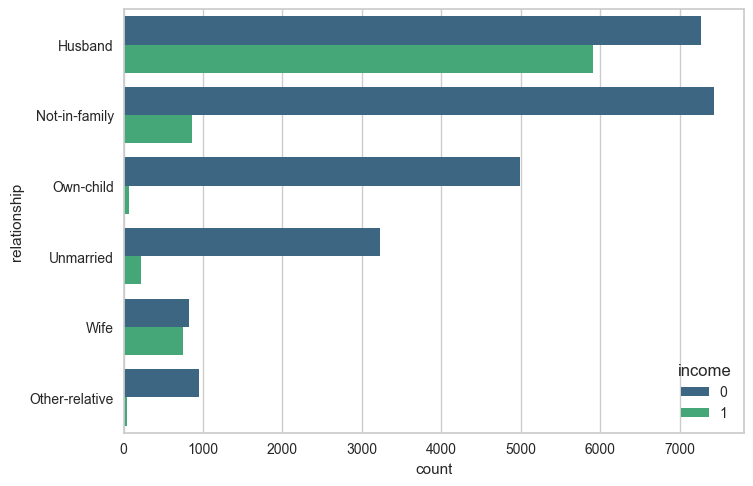

In [41]:
sns.countplot(y='relationship', hue='income', data=df, order=df['relationship'].value_counts().index, palette='viridis');

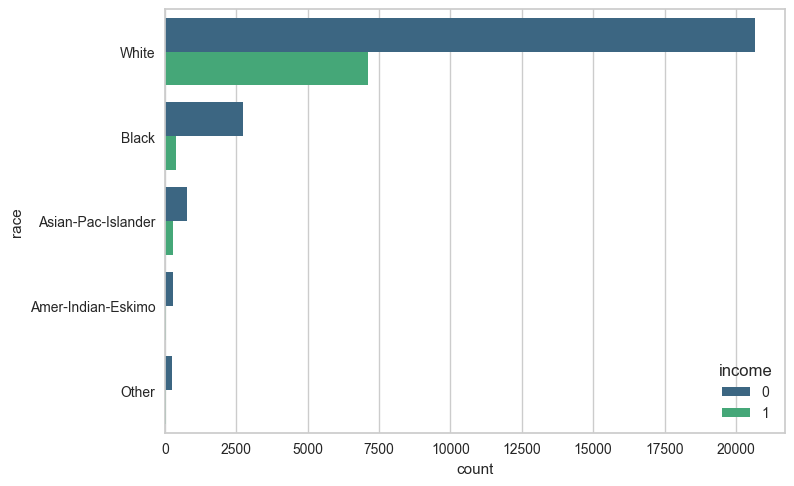

In [42]:
sns.countplot(y='race', hue='income', data=df, order=df['race'].value_counts().index, palette='viridis');

In [43]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Others', inplace = True)

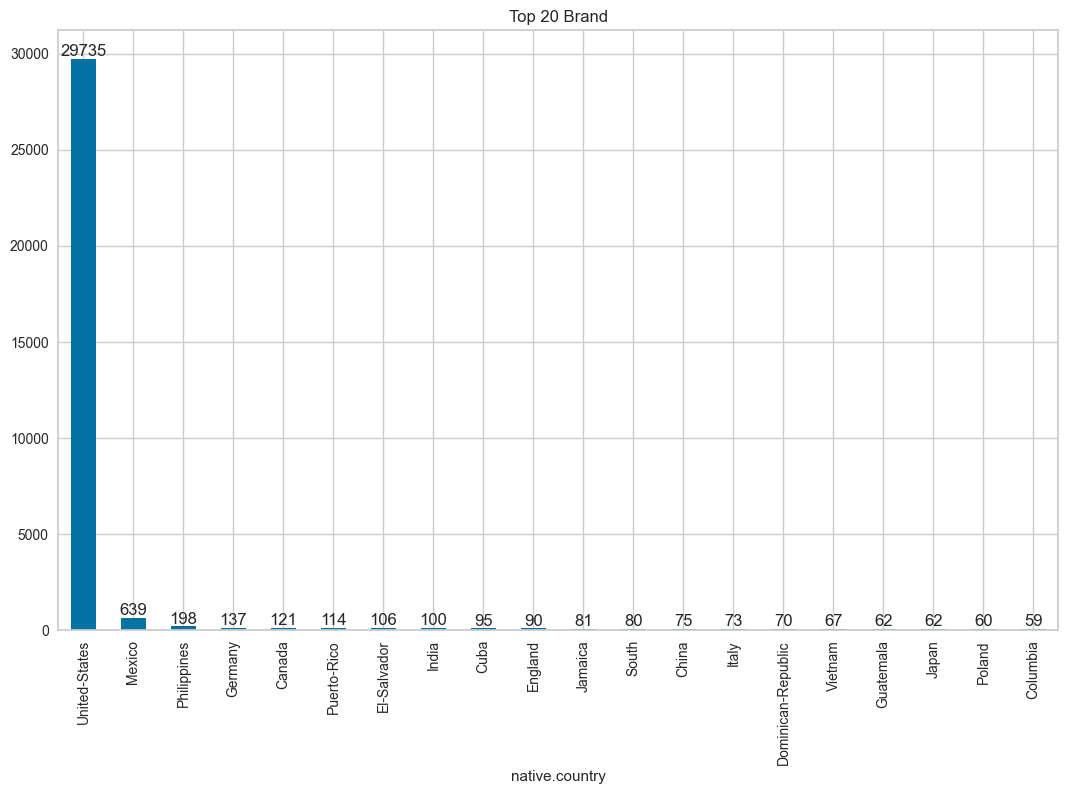

In [44]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df["native.country"].value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')   
plt.xlabel('native.country') 
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [45]:
df['native.country'] = df['native.country'].replace({
    "USA": "United-States"
}).apply(lambda x: "United-States" if x == "United-States" else ("Mexico" if x == "Mexico" else "Other"))

***General Insights:***

- ***Data Imbalance:***

The data is heavily skewed towards individuals from the United States, which could impact the generalizability of any models or analyses performed.

The dataset is predominantly composed of individuals from the United States, with a minor but noticeable representation from Mexico and a variety of other countries. This heavy imbalance towards the US population suggests the need for careful handling of data to avoid biases.

Given the significant representation from Mexico, segmented analyses (e.g., comparing outcomes between US natives and Mexican immigrants) might be feasible and insightful.

For other countries with smaller representations, aggregated analyses might be more appropriate.


#### Numerical Features

In [46]:
# df['age_bin'] = pd.cut(df['age'], bins=20)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# sns.countplot(y='age_bin', data=df, palette='viridis', ax=ax1)
# sns.histplot(data=df, x='age', hue='income', kde=True, palette='viridis', ax=ax2, stat='density', common_norm=False);

In [47]:
px.histogram(df, x='capital.gain', color="income", barmode='group', title='Income Distribution by Capital Gain')

In [48]:
px.histogram(df, x='capital.loss', color="income", barmode='group', title='Income Distribution by Capital Loss')

In [49]:
df['capital_diff'] = df['capital.gain'] - df['capital.loss']
df['capital_diff'] = pd.cut(df['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['capital_diff'] = df['capital_diff'].astype('object')
df.drop(['capital.gain'], axis = 1, inplace = True)
df.drop(['capital.loss'], axis = 1, inplace = True)

***Purpose:*** To combine the capital.gain (capital gain) and capital.loss (capital loss) columns into a single column to calculate the net capital gain.

***Result:*** A new column named capital_diff is created.

In [50]:
px.histogram(df, x='capital_diff', color="income", barmode='group', title='Income Distribution by Capital diff')

In [51]:
px.histogram(df, x='hours.per.week', color="income", barmode='group', title='Income Distribution by Hours per Week')

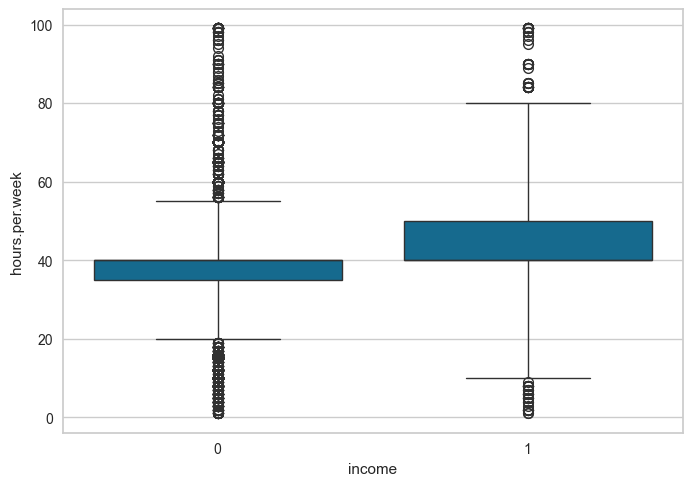

In [52]:
sns.boxplot(data=df,y="hours.per.week",x='income', whis=3);

In [53]:
outliers = df[df['hours.per.week'] > 80]
outliers_income_counts = outliers['income'].value_counts()
outliers_income_counts

income
0    145
1     63
Name: count, dtype: int64

In [54]:
outliers = df[df['hours.per.week'] < 15]
outliers_income_counts = outliers['income'].value_counts()
outliers_income_counts

income
0    892
1     81
Name: count, dtype: int64

In [55]:
df = df[~((df["hours.per.week"] > 80) | (df["hours.per.week"] < 15))]

The code segments are used to analyze the income status of individuals with extremely high or low weekly working hours and to remove these outliers from the dataset.

In [56]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

In [57]:
df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'hours.per.week',
       'native.country', 'income', 'capital_diff'],
      dtype='object')

***fnlwgt:*** As a result of the analysis, the effect of fnlwgt on the model is almost negligible. Therefore, it was excluded from the data.

In [58]:
df.shape

(31356, 13)

In [59]:
df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'hours.per.week',
       'native.country', 'income', 'capital_diff'],
      dtype='object')

### Correlation 

In [60]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

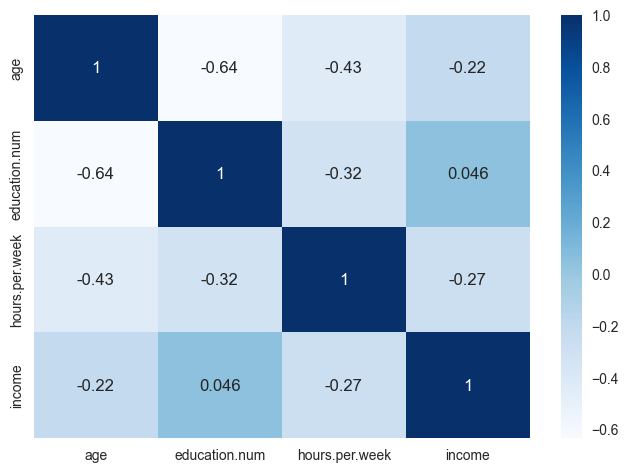

In [61]:
sns.heatmap(corr_matrix .corr(), annot=True, cmap="Blues");

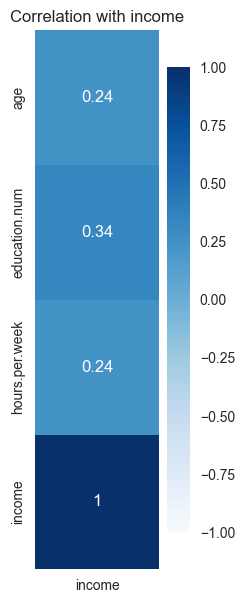

In [62]:
def plot_target_correlation_heatmap(df, target_variable):
    df_numeric = df.select_dtypes(include=[np.number])
    df_corr_target = df_numeric.corr()
    
    plt.figure(figsize=(2, 7))
    sns.heatmap(df_corr_target[[target_variable]], annot=True, vmin=-1, vmax=1, cmap="Blues")
    plt.title(f'Correlation with {target_variable}')
    plt.show()
plot_target_correlation_heatmap(df, 'income')

#### Multicollinearity

In [63]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

numeric_df = df.select_dtypes(include=[np.number])

numeric_df.corr().style.applymap(color_correlation1)

In [64]:
X = df.drop("income", axis=1)
y = df['income'] 

### Models

#### Train | Test Split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

#### make_column_transformer

In [66]:
df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'hours.per.week',
       'native.country', 'income', 'capital_diff'],
      dtype='object')

In [67]:
cat_onehot = [
    'workclass', 'occupation', 'relationship', 'race', 'sex', 'native.country',
    'marital.status'
]
cat_ordinal = ['education', 'capital_diff']

cat_for_edu = [
    'Preschool', 'elementary_school', 'secondary_school', 'HS-grad',
    'Some-college', 'Assoc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
]
cat_for_capdiff = ['Low', 'High']

In [68]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
    (OrdinalEncoder(categories=[cat_for_edu, cat_for_capdiff]), cat_ordinal),
    remainder=StandardScaler())

### Logistic Regression Model

In [69]:
operations = [("transformer", column_trans), ("logistic", LogisticRegression(max_iter=1000, random_state=42))]

pipe_model = Pipeline(steps=operations)


pipe_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('logistic',
                 LogisticRegression(max_iter=1000, random_state=42))])

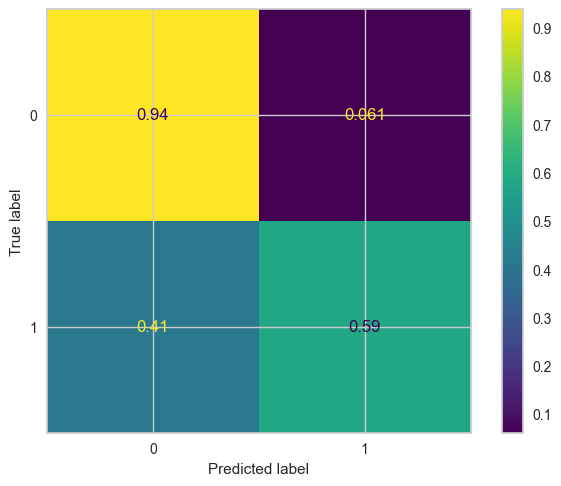

In [70]:
ConfusionMatrixDisplay.from_estimator(pipe_model,
                                      X_test,
                                      y_test,
                                      normalize='true');

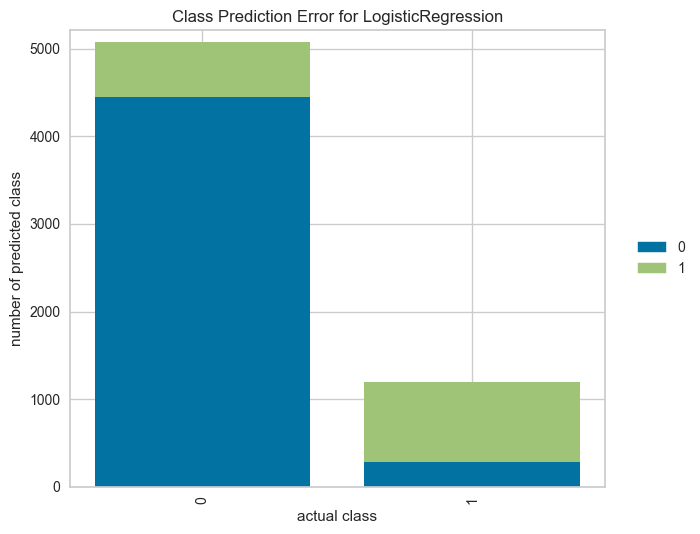

In [71]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(pipe_model)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.poof();

In [72]:
def eval_metric(model, X_train, y_train, X_test, y_test,i):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(f"{i} Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(f"{i} Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [73]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "logistic")

logistic Test_Set
[[4443  290]
 [ 636  903]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4733
           1       0.76      0.59      0.66      1539

    accuracy                           0.85      6272
   macro avg       0.82      0.76      0.78      6272
weighted avg       0.85      0.85      0.85      6272


logistic Train_Set
[[17632  1296]
 [ 2528  3628]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     18928
           1       0.74      0.59      0.65      6156

    accuracy                           0.85     25084
   macro avg       0.81      0.76      0.78     25084
weighted avg       0.84      0.85      0.84     25084



#### Cross Validate

In [74]:
from sklearn.model_selection import StratifiedKFold

operations = [("transformer", column_trans), ("logistic", LogisticRegression(max_iter=1000, random_state=42))]

pipecv_model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10) 

scores = cross_validate(pipecv_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision", "recall", "f1"],
                        cv=cv,
                        return_train_score = True)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_accuracy      0.846596
train_accuracy     0.847592
test_precision     0.734399
train_precision    0.736330
test_recall        0.588533
train_recall       0.590391
test_f1            0.653064
train_f1           0.655332
dtype: float64

#### Precision Recall Curve and Roc Curve Display

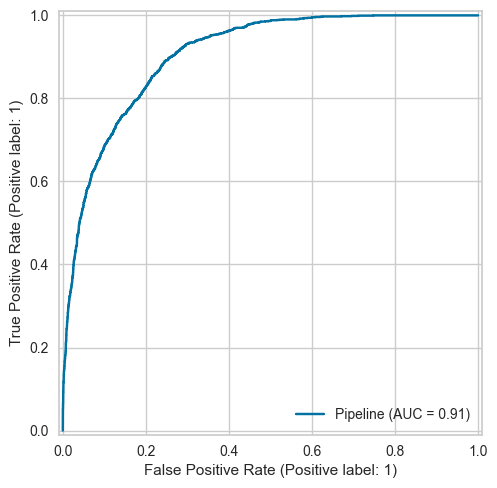

In [75]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test);

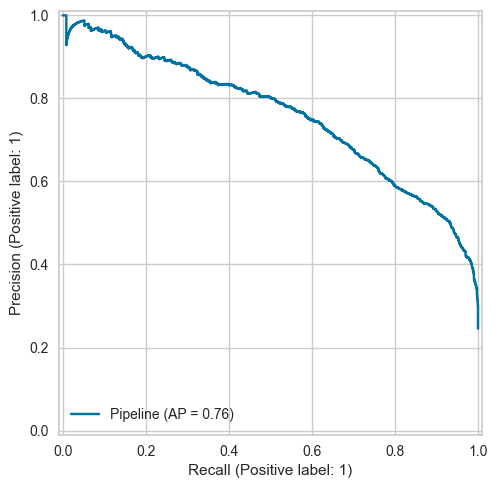

In [76]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test);

#### GridSearchCV

param_grid = [ { "logistic__penalty" : ['l1', 'l2'], "logistic__C" : [0.01, 0.05,0.03, 0.1, 1], "logistic__class_weight": ["balanced", None] , "logistic__solver": ['liblinear', 'saga', 'lbfgs'], "logistic__max_iter": [1000, 2000] } ]

Many grids of money have been tried. Finally, the following features were identified.


In [77]:
operations = [("transformer", column_trans), ("logistic", LogisticRegression(random_state=42))]

log_model = Pipeline(steps=operations)

param_grid = [
    {
        "logistic__penalty" : ['l1'],
        "logistic__C" : [0.03],
        "logistic__class_weight": ["balanced"] ,
        "logistic__solver": ['saga'],
        "logistic__max_iter": [1000]
    }
]
cv = StratifiedKFold(n_splits = 10) 

grid_model = GridSearchCV(estimator=log_model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "f1",
                          n_jobs = -1,
                          return_train_score=True).fit(X_train, y_train)

In [78]:
grid_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('logistic',
                 LogisticRegression(C=0.03, class_weight='balanced',
                                    max_iter=1000, penalty='l1',
                                    random_state=42, solver='saga'))])

In [79]:
grid_model.best_score_

np.float64(0.683264633932356)

In [80]:
grid_model.best_index_

np.int64(0)

In [81]:
pd.DataFrame(grid_model.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.683265
mean_train_score    0.682596
Name: 0, dtype: object

In [82]:
from sklearn.metrics import precision_recall_curve

y_pred = grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)

log_f1 = f1_score(y_test, y_pred)

log_recall = recall_score(y_test, y_pred)

log_auc = roc_auc_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, grid_model.predict_proba(X_test)[:, 1])
log_prc = auc(recall, precision)

log_grid_model = eval_metric(grid_model, X_train, y_train, X_test, y_test,"logisticgrid")
log_grid_model

logisticgrid Test_Set
[[3783  950]
 [ 253 1286]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4733
           1       0.58      0.84      0.68      1539

    accuracy                           0.81      6272
   macro avg       0.76      0.82      0.77      6272
weighted avg       0.85      0.81      0.82      6272


logisticgrid Train_Set
[[15047  3881]
 [  952  5204]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     18928
           1       0.57      0.85      0.68      6156

    accuracy                           0.81     25084
   macro avg       0.76      0.82      0.77     25084
weighted avg       0.85      0.81      0.82     25084



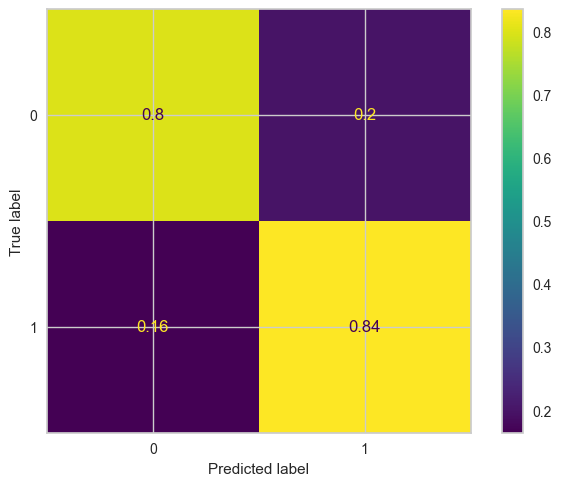

In [83]:
log_grid_matrix = ConfusionMatrixDisplay.from_estimator(grid_model,
                                                        X_test,
                                                        y_test,
                                                        normalize='true');

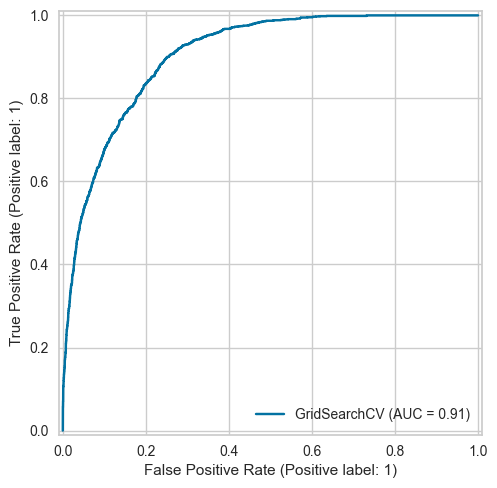

In [84]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test);

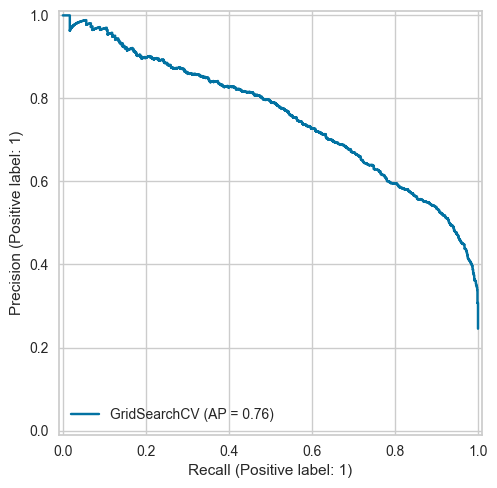

In [85]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

### KNN Model

In [86]:
operations = [("transformer", column_trans), ("knn", KNeighborsClassifier())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('knn', KNeighborsClassifier())])

In [87]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "knn")

knn Test_Set
[[4286  447]
 [ 657  882]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4733
           1       0.66      0.57      0.62      1539

    accuracy                           0.82      6272
   macro avg       0.77      0.74      0.75      6272
weighted avg       0.82      0.82      0.82      6272


knn Train_Set
[[17746  1182]
 [ 1881  4275]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     18928
           1       0.78      0.69      0.74      6156

    accuracy                           0.88     25084
   macro avg       0.84      0.82      0.83     25084
weighted avg       0.87      0.88      0.88     25084



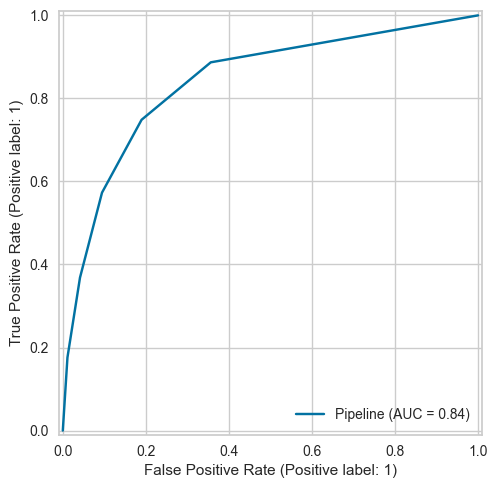

In [88]:
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test);

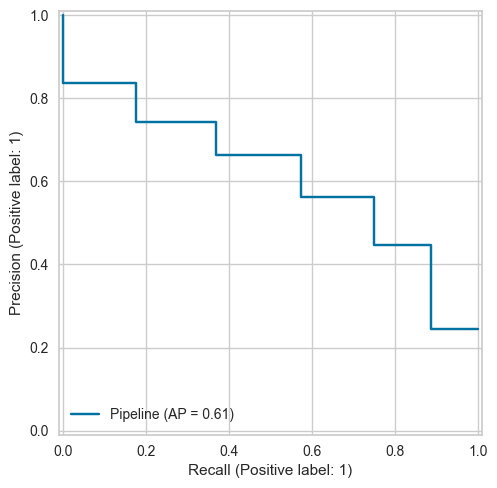

In [89]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test);

#### Elbow Method for Choosing Reasonable K Values

In [90]:
operations = [("transformer", column_trans), ("knn", KNeighborsClassifier())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('knn', KNeighborsClassifier())])

In [91]:
test_error_rates = []

for k in range(1, 10):

    operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['f1'], cv = 5)
    
    f1_mean = scores["test_f1"].mean() 
    
    test_error = 1 - f1_mean
    
    test_error_rates.append(test_error)

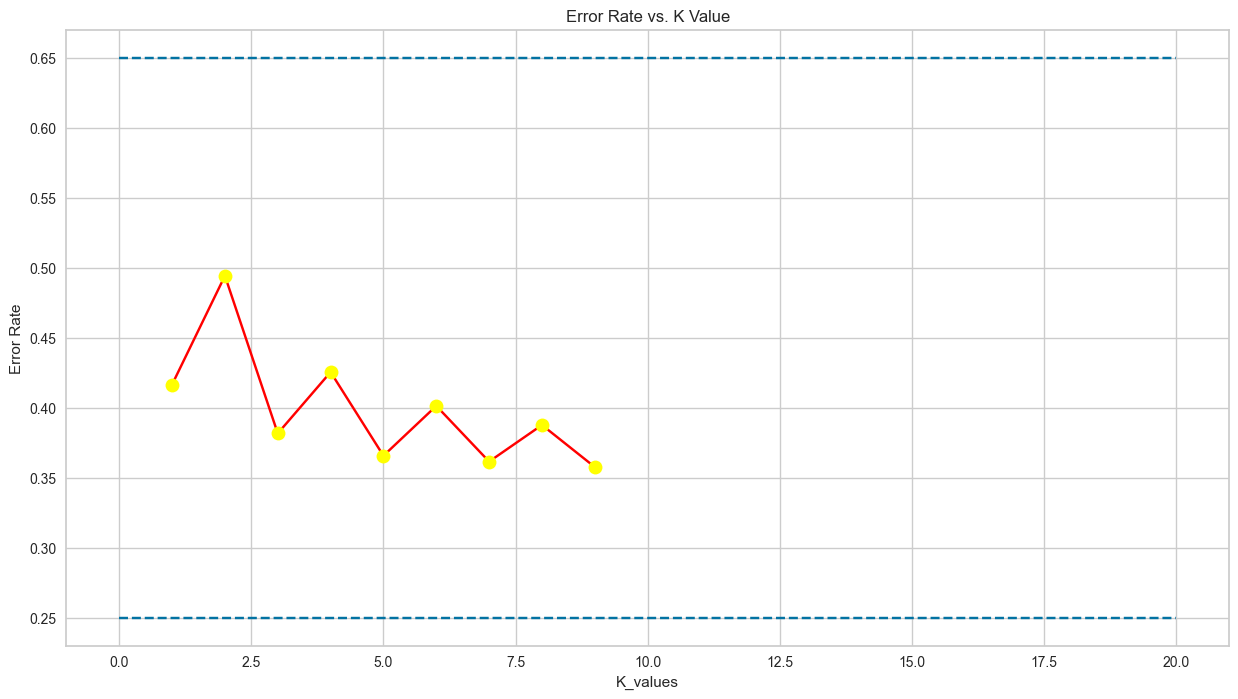

In [92]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 10),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.25, xmin=0, xmax=20, colors='b', linestyles="--")
plt.hlines(y=0.65, xmin=0, xmax=20, colors='b', linestyles="--")

#### Overfitting and underfitting control for k values

In [93]:
test_error_rates = []
train_error_rates = []

for k in range(1, 10):

    operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)

    knn_pipe_model.fit(X_train, y_train)

    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['f1'], cv = 5, return_train_score=True)
    
    f1_test_mean = scores["test_f1"].mean() 
    f1_train_mean = scores["train_f1"].mean() 

    
    test_error = 1 - f1_test_mean
    train_error = 1 -f1_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

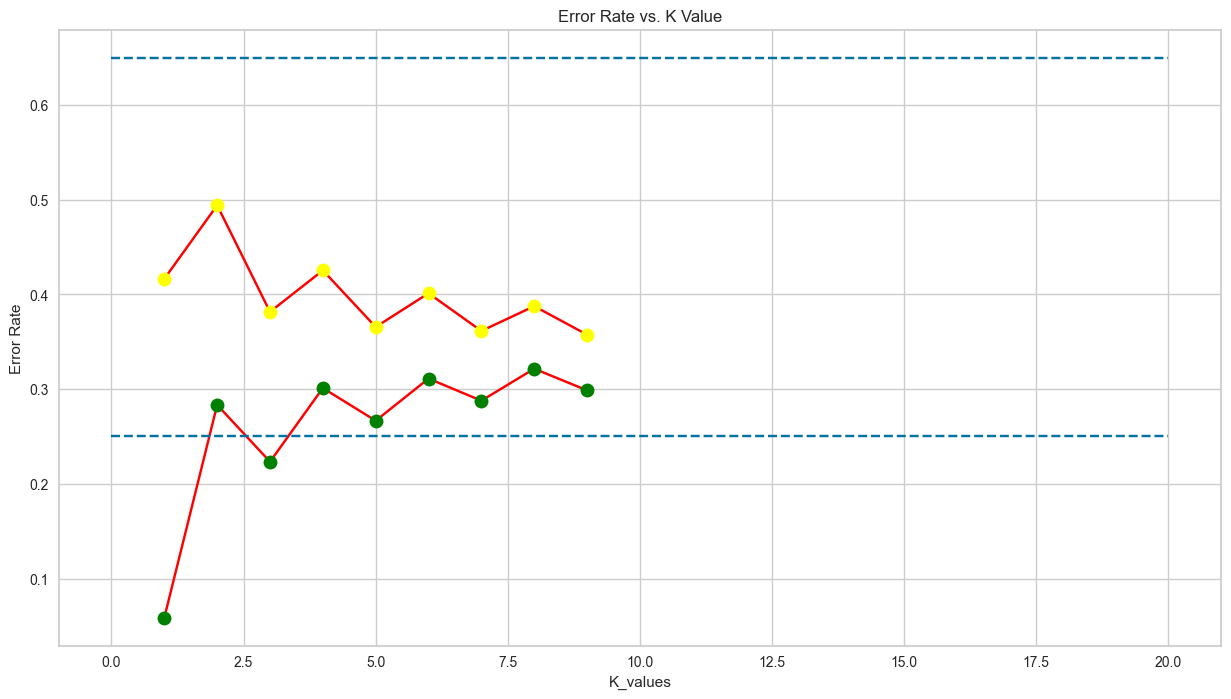

In [94]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 10),
         test_error_rates,
         color='red',
         marker='o',
         markerfacecolor='yellow',
         markersize=10)

plt.plot(range(1, 10),
         train_error_rates,
         color='red',
         marker='o',
         markerfacecolor='green',
         markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.25, xmin=0, xmax=20, colors='b', linestyles="--")
plt.hlines(y=0.65, xmin=0, xmax=20, colors='b', linestyles="--")

In [95]:
k_list = [3, 5, 7]

for i in k_list:
    operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=i))]
    knn = Pipeline(steps=operations)
    knn.fit(X_train, y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train, y_train, X_test, y_test, "knn_elbow")

WITH K=3

knn_elbow Test_Set
[[4243  490]
 [ 686  853]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4733
           1       0.64      0.55      0.59      1539

    accuracy                           0.81      6272
   macro avg       0.75      0.73      0.74      6272
weighted avg       0.81      0.81      0.81      6272


knn_elbow Train_Set
[[17848  1080]
 [ 1568  4588]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     18928
           1       0.81      0.75      0.78      6156

    accuracy                           0.89     25084
   macro avg       0.86      0.84      0.85     25084
weighted avg       0.89      0.89      0.89     25084

WITH K=5

knn_elbow Test_Set
[[4286  447]
 [ 657  882]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4733
           1       0.66      0.57      0.62      1539

    accuracy      

#### Cross Validate For Optimal K Value

In [96]:
operations =   operations = [("transformer", column_trans), ("knn", KNeighborsClassifier(n_neighbors=7))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.834715
train_accuracy     0.868296
test_precision     0.686404
train_precision    0.763656
test_recall        0.602178
train_recall       0.671017
test_f1            0.641338
train_f1           0.714341
dtype: float64

#### Gridsearch Method for Choosing Reasonable K Values

In [97]:
operations = [("transformer", column_trans), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

Many grids of money have been tried. Finally, the following features were identified.Tried values up to k_values = 30.

In [98]:
param_grid = [
    {
        "knn__n_neighbors": [19],
        "knn__metric": ['euclidean'],
        "knn__weights": ['uniform']
    }
]

knn_grid_model = GridSearchCV(knn_model,
                              param_grid,
                              scoring='f1',
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1).fit(X_train, y_train)

In [99]:
knn_grid_model.best_estimator_ 

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=19))])

In [100]:
knn_grid_model.best_index_

np.int64(0)

In [101]:
pd.DataFrame(
    knn_grid_model.cv_results_).loc[0,["mean_test_score", "mean_train_score"]]

mean_test_score       0.6397
mean_train_score    0.675013
Name: 0, dtype: object

In [102]:
knn_grid_model.best_score_

np.float64(0.6396999259520801)

In [103]:
y_pred = knn_grid_model.predict(X_test)
y_pred_proba = knn_grid_model.predict_proba(X_test)

knn_f1 = f1_score(y_test, y_pred)

knn_recall = recall_score(y_test, y_pred)

knn_auc = roc_auc_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, knn_grid_model.predict_proba(X_test)[:, 1])
knn_prc = auc(recall, precision)

eval_metric(knn_grid_model, X_train, y_train, X_test, y_test, "knn_grid") #k=19

knn_grid Test_Set
[[4366  367]
 [ 625  914]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4733
           1       0.71      0.59      0.65      1539

    accuracy                           0.84      6272
   macro avg       0.79      0.76      0.77      6272
weighted avg       0.84      0.84      0.84      6272


knn_grid Train_Set
[[17492  1436]
 [ 2269  3887]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     18928
           1       0.73      0.63      0.68      6156

    accuracy                           0.85     25084
   macro avg       0.81      0.78      0.79     25084
weighted avg       0.85      0.85      0.85     25084



As a result of the values we gave to K, the tests did not improve, but we prevented overfitting and found more reliable results

#### Precision Recall Curve and Roc Curve Display

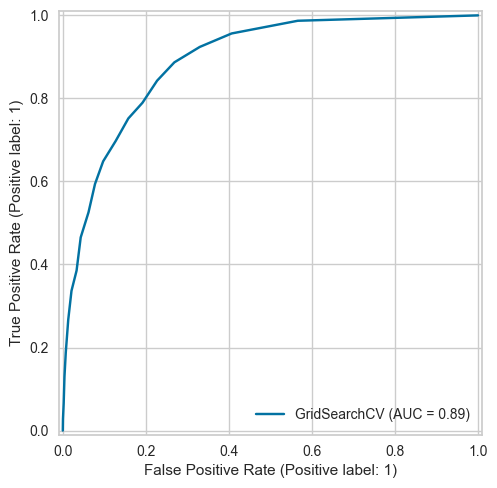

In [104]:
RocCurveDisplay.from_estimator(knn_grid_model, X_test, y_test);

In [105]:
y_pred_proba = knn.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

np.float64(0.8601990887807903)

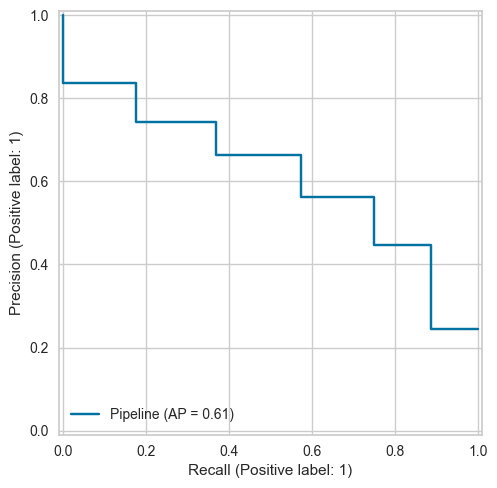

In [106]:
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test)

### SVM Model

In [107]:
operations = [("transformer", column_trans),("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('SVC', SVC(random_state=42))])

#### Model Performance

In [108]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, "svm")

svm Test_Set
[[4498  235]
 [ 692  847]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4733
           1       0.78      0.55      0.65      1539

    accuracy                           0.85      6272
   macro avg       0.82      0.75      0.78      6272
weighted avg       0.85      0.85      0.84      6272


svm Train_Set
[[17901  1027]
 [ 2756  3400]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.90     18928
           1       0.77      0.55      0.64      6156

    accuracy                           0.85     25084
   macro avg       0.82      0.75      0.77     25084
weighted avg       0.84      0.85      0.84     25084



In [109]:
operations = [("transformer", column_trans), ("SVC", SVC(random_state=42))]

pipe_model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=5) 

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=cv,
                        return_train_score=True,
                        n_jobs=-1)

df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_accuracy      0.847353
train_accuracy     0.849097
test_precision     0.764130
train_precision    0.769085
test_recall        0.546947
train_recall       0.550357
test_f1            0.637474
train_f1           0.641591
dtype: float64

#### GridsearchCV

param_grid = {'SVC__C': [0.01, 0.1, 1, 10, 100], 'SVC__gamma': ["scale", "auto", 0.001, 0.01, 0.1, 0.5], 'SVC__kernel': ['rbf', 'linear'],} Many grids of money have been tried. Finally, the following features were identified.

In [110]:
param_grid = {"SVC__C":[1],
             "SVC__gamma":[0.3],
             "SVC__kernel":["rbf"]}

operations = [("transformer", column_trans), ("SVC", SVC(class_weight="balanced"))]

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall_macro",
                              cv=5,
                              return_train_score=True,
                              n_jobs=2,
                              verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [111]:
svm_model_grid.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native.country',
                                                   'marital.status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'elementary_school',
                                                                              'secondary_school',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('SVC', SVC(C=1, gamma=0.3, random_state=42))])

In [112]:
svm_model_grid.best_index_

np.int64(0)

In [113]:
pd.DataFrame(
    svm_model_grid.cv_results_).loc[0,
                                    ["mean_test_score", "mean_train_score"]]

mean_test_score     0.773176
mean_train_score    0.807849
Name: 0, dtype: object

In [114]:
svm_model_grid.best_score_

np.float64(0.7731760615298443)

In [115]:
y_pred = svm_model_grid.predict(X_test)
y_pred_proba = svm_model_grid.decision_function(X_test)

svm_f1 = f1_score(y_test, y_pred)

svm_recall = recall_score(y_test, y_pred)

svm_auc = roc_auc_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, svm_model_grid.decision_function(X_test))
svm_prc = auc(recall, precision)

eval_metric(svm_model_grid, X_train, y_train, X_test, y_test, "svm_grid")

svm_grid Test_Set
[[4409  324]
 [ 607  932]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4733
           1       0.74      0.61      0.67      1539

    accuracy                           0.85      6272
   macro avg       0.81      0.77      0.79      6272
weighted avg       0.85      0.85      0.85      6272


svm_grid Train_Set
[[17835  1093]
 [ 2040  4116]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     18928
           1       0.79      0.67      0.72      6156

    accuracy                           0.88     25084
   macro avg       0.84      0.81      0.82     25084
weighted avg       0.87      0.88      0.87     25084



In [116]:
decision_function = svm_model_grid.decision_function(X_test)
average_precision_score(y_test, decision_function)

np.float64(0.731964885295869)

#### Precision Recall Curve and Roc Curve Display

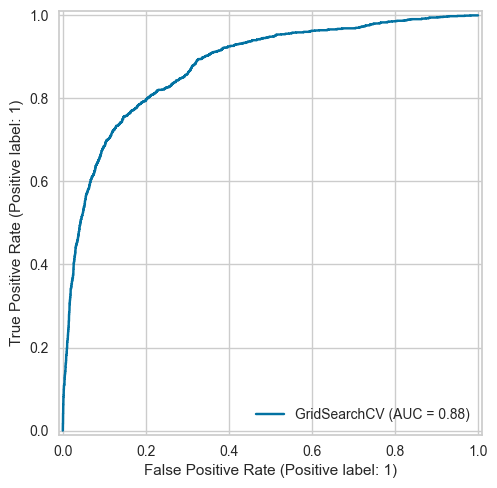

In [117]:
RocCurveDisplay.from_estimator(svm_model_grid, X_test, y_test);

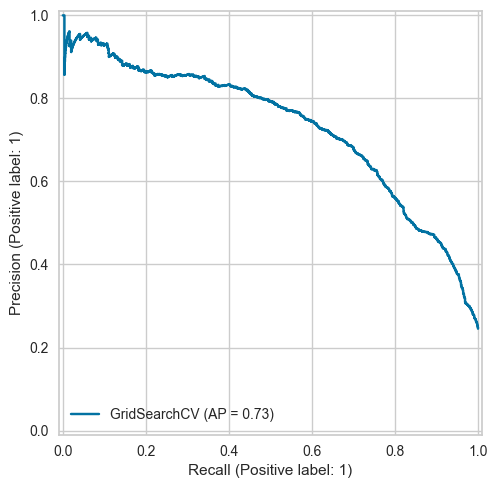

In [118]:
PrecisionRecallDisplay.from_estimator(svm_model_grid, X_test, y_test);

### Compare Models Performance

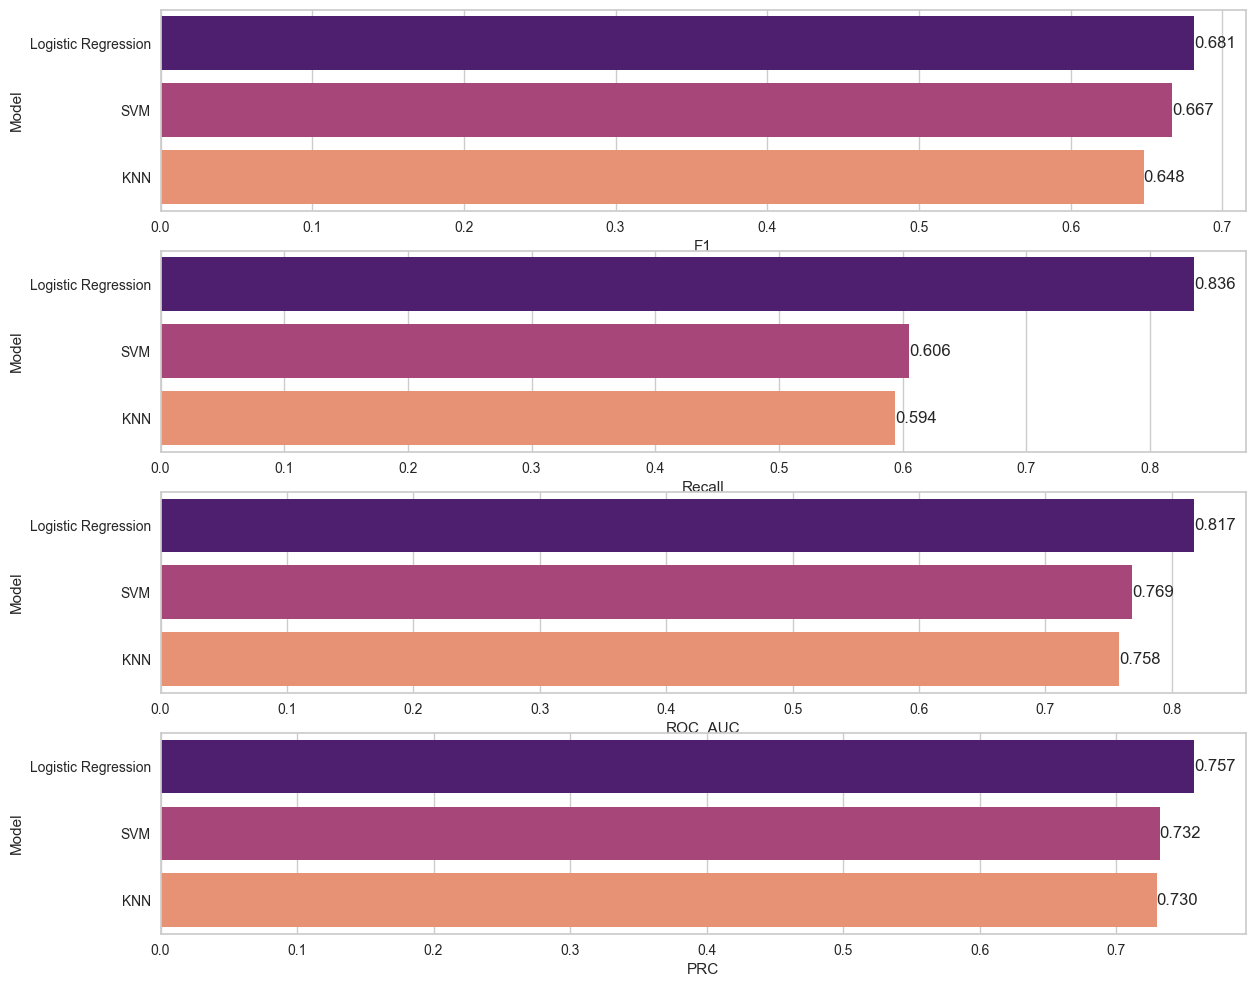

In [119]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM"],
                        "F1": [log_f1, knn_f1, svm_f1 ],
                        "Recall": [log_recall, knn_recall, svm_recall ],
                        "ROC_AUC": [log_auc, knn_auc, svm_auc],
                         "PRC"   : [log_prc, knn_prc, svm_prc]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.figure(figsize=(14,12))

plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="PRC", ascending=False)
ax=sns.barplot(x="PRC", y="Model", data=compare, palette="magma")
labels(ax)

plt.show()

### Final Model and Model Deployment

In [120]:
operations = [("transformer", column_trans), ("logistic", LogisticRegression(random_state=42))]

log_model = Pipeline(steps=operations)

param_grid = [
    {
        "logistic__penalty" : ['l1'],
        "logistic__C" : [0.03],
        "logistic__class_weight": ["balanced"] ,
        "logistic__solver": ['saga'],
        "logistic__max_iter": [1000]
    }
]
cv = StratifiedKFold(n_splits = 10) 

final_pipe_model = GridSearchCV(estimator=log_model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "f1",
                          n_jobs = -1,
                          return_train_score=True).fit(X, y)

In [121]:
import pickle

pickle.dump(pipe_model, open("final_pipe_model", "wb"))

In [128]:
new_model = pickle.load(open("final_pipe_model", "rb"))
new_model

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['workclass',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native.country',
                                                                          'marital.status']),
                                                                        ('ordin...
                                                                                                     'Bachelors',
                                                                                                     'Masters',
                                                                                                     'Prof-school',
                                                                                                     'Doctorate'],
                                                                                                    ['Low',
                                                                                                     'High']]),
                                                                         ['education',
                                                                          'capital_diff'])])),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'logistic__C': [0.03],
                          'logistic__class_weight': ['balanced'],
                          'logistic__max_iter': [1000],
                          'logistic__penalty': ['l1'],
                          'logistic__solver': ['saga']}],
             return_train_score=True, scoring='f1')

### Prediction

In [129]:
my_dict= {
    'age': [44.0, 32.0, 30.0],
    'workclass': ['Federal-gov', 'Private', 'Self-emp-not-inc'],
    'education': ['Bachelors', 'Bachelors', 'Some-college'],
    'education.num': [13.0, 13.0, 10.0],
    'marital.status': ['Widowed', 'Married', 'NotMarried'],
    'occupation': ['Tech-support', 'Sales', 'Sales'],
    'relationship': ['Not-in-family', 'Husband', 'Other-relative'],
    'race': ['White', 'White', 'Others'],
    'sex': ['Male', 'Male', 'Male'],
    'hours.per.week': [40.0, 40.0, 40.0],
    'native.country': ['United-States', 'United-States', 'Other'],
    'capital_diff': ['Low', 'Low', 'Low']
}

In [130]:
sample = pd.DataFrame(my_dict)
sample

age         workclass     education  education.num marital.status  \
0  44.0       Federal-gov     Bachelors           13.0        Widowed   
1  32.0           Private     Bachelors           13.0        Married   
2  30.0  Self-emp-not-inc  Some-college           10.0     NotMarried   

     occupation    relationship    race   sex  hours.per.week native.country  \
0  Tech-support   Not-in-family   White  Male            40.0  United-States   
1         Sales         Husband   White  Male            40.0  United-States   
2         Sales  Other-relative  Others  Male            40.0          Other   

  capital_diff  
0          Low  
1          Low  
2          Low

In [131]:
new_model.predict(sample)

array([1, 1, 0])

In [132]:
new_model.decision_function(sample)

array([ 0.27369739,  1.16079392, -2.56091314])

## Conclusion

In [127]:
#   Logistic grid      recall: 83,  f1 :  0.68   prc=0.75 

- In an unbalanced dataset, F1-Score and Recall metrics are indeed very important. These metrics play a critical role in evaluating model performance in unbalanced datasets, as they measure the model's ability to correctly predict the minority class.

***When prioritizing F1-Score and Recall:***

- The Logistic Regression model stands out with a Recall of 0.83 and an F1-Score of 0.68. This model demonstrates balanced performance across the classes in the unbalanced dataset, effectively capturing the minority class while also performing well in overall classification.

- The KNN Model, although it performs well in terms of accuracy, lags behind Logistic Regression with a Recall of 0.59 and an F1-Score of 0.64. This indicates that the model is less effective at capturing the minority class in the unbalanced dataset.

- The SVM Model, despite excelling in accuracy, also falls behind Logistic Regression in these two metrics with a Recall of 0.60 and an F1-Score of 0.66. It is evident that SVM is not sufficiently successful in capturing the minority class.

**Based on these results, I can say that the Logistic Regression model offers the best performance in terms of Recall and F1-Score for unbalanced datasets and should therefore be preferred. Especially in unbalanced datasets, it is critical that the model correctly identifies the minority class, making Logistic Regression the most suitable choice.**


***